### Jonny Oglesby 

# DA301:  Advanced Analytics for Organisational Impact

## Instructions
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

### Code to explore
### Q1: How customers accumulate loyalty points?

## 1. Load and explore the data

In [1]:
import os as os
os. getcwd() 

'C:\\Users\\j_ogl\\Documents'

In [2]:
os.chdir('C:\\Users\\j_ogl\\Documents')

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import nltk as nltk
from statsmodels.formula.api import ols

In [4]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head(3)

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless

In [5]:
# Check data for any missing values.
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [6]:
# Explore the data, data types and number of values.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [7]:
# See the unique values in language column, check this with the number and decide to remove as only one value
print(reviews['language'].unique())
reviews['language'].nunique()

['EN']


1

In [8]:
# See the unique values in platform column, check this with the number and decide to remove as only one value
print(reviews['platform'].unique())
reviews['platform'].nunique()

['Web']


1

In [9]:
# See the unique product values in column, check this with the number and decide to keep
reviews['product'].nunique()

200

#### I also read the meta data to understand the data which confirmed that language and platform contained the same answer so were not needed.


In [10]:
# Descriptive statistics.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

In [11]:
# Check df for duplciates
d_values = reviews.duplicated()
print(d_values)

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool


##
##

## 2. Drop columns

In [12]:
# View column names to decide on those to keep. 
cols = [c for c in reviews.columns]  
cols

['gender',
 'age',
 'remuneration (k£)',
 'spending_score (1-100)',
 'loyalty_points',
 'education',
 'language',
 'platform',
 'product',
 'review',
 'summary']

In [13]:
# Drop unnecessary columns.
Reviewdropped1 = reviews.drop(['review','summary','language','platform','education','product'] , axis=1)

# View column names to check unnecessary columns are dropped.
Reviewdropped1.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points'],
      dtype='object')

####

## 3. Rename columns

In [14]:
# Rename the column headers to be clearer.
Reviewdropped1.columns = Reviewdropped1.columns.str.replace('remuneration (k£)', 'renumeration')
Reviewdropped1.columns = Reviewdropped1.columns.str.replace('spending_score (1-100)', 'spending_score')

# View column names.
Reviewdropped1.columns

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points'], dtype='object')

In [15]:
# Try using new method to change df names and check
Reviewdropped1.rename(columns={'remuneration (k£)': 'renumeration', 'spending_score (1-100)':'spending_score'}, inplace=True)
Reviewdropped1.columns

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points'], dtype='object')

####

## 4. Save the DataFrame as a CSV file

In [16]:
# Load the CSV file(s) as reviews.
reviewsdropped1 = pd.read_csv('Reviewdropped1.csv')

# View the DataFrame.
reviewsdropped1.head(3)

Unnamed: 0  gender  age  renumeration  spending_score  loyalty_points
0           0    Male   18         12.30              39             210
1           1    Male   23         12.30              81             524
2           2  Female   22         13.12               6              40

In [17]:
# Create a CSV file as output.
Reviewdropped1.to_csv('Reviewdropped1.csv')

In [18]:
# Import new CSV file with Pandas.
# Check the data and view summaries.
reviews1 = pd.read_csv('Reviewdropped1.csv')

# View DataFrame.
reviews1

Unnamed: 0  gender  age  renumeration  spending_score  loyalty_points
0              0    Male   18         12.30              39             210
1              1    Male   23         12.30              81             524
2              2  Female   22         13.12               6              40
3              3  Female   25         13.12              77             562
4              4  Female   33         13.94              40             366
...          ...     ...  ...           ...             ...             ...
1995        1995  Female   37         84.46              69            4031
1996        1996  Female   43         92.66               8             539
1997        1997    Male   34         92.66              91            5614
1998        1998    Male   34         98.40              16            1048
1999        1999    Male   32         92.66               8             479

[2000 rows x 6 columns]

In [19]:
reviews1.columns

Index(['Unnamed: 0', 'gender', 'age', 'renumeration', 'spending_score',
       'loyalty_points'],
      dtype='object')

In [20]:
reviews1.describe()

Unnamed: 0          age  renumeration  spending_score  loyalty_points
count  2000.000000  2000.000000   2000.000000     2000.000000     2000.000000
mean    999.500000    39.495000     48.079060       50.000000     1578.032000
std     577.494589    13.573212     23.123984       26.094702     1283.239705
min       0.000000    17.000000     12.300000        1.000000       25.000000
25%     499.750000    29.000000     30.340000       32.000000      772.000000
50%     999.500000    38.000000     47.150000       50.000000     1276.000000
75%    1499.250000    49.000000     63.960000       73.000000     1751.250000
max    1999.000000    72.000000    112.340000       99.000000     6847.000000

####

## 5. Linear regression

### 5a) Spending vs Loyalty

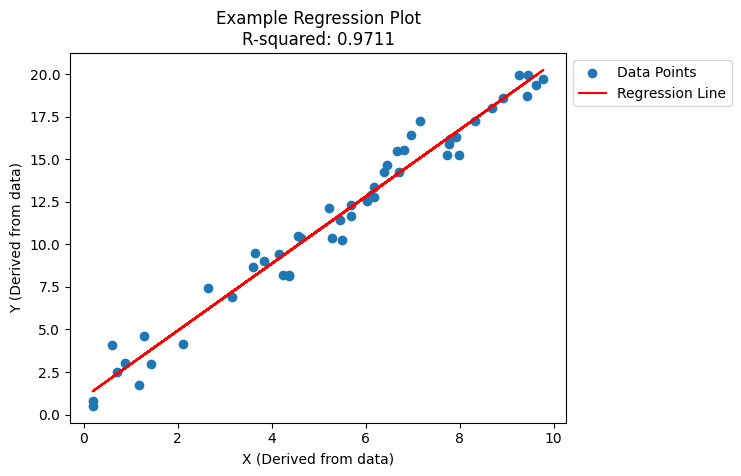

In [21]:
# Create a function to plot a linear regression line 
import numpy as np
import matplotlib.pyplot as plt

def plot_regression_line(x, y, x_label=None, y_label=None, title='Regression Plot'):
    # Fit a linear regression model
    slope, intercept = np.polyfit(x, y, 1)

    # Create the regression line
    regression_line = slope * x + intercept

    # Calculate the R-squared value
    y_mean = np.mean(y)
    ss_total = np.sum((y - y_mean) ** 2)
    ss_residual = np.sum((y - regression_line) ** 2)
    r_squared = 1 - (ss_residual / ss_total)

    # Plot the data points
    plt.scatter(x, y, label='Data Points')

    # Plot the regression line
    plt.plot(x, regression_line, color='red', label='Regression Line')

    # Add labels and a legend
    plt.xlabel(x_label if x_label else 'X')
    plt.ylabel(y_label if y_label else 'Y')

    # Add a title
    plt.title(title)

    # Add a title with the R-squared value
    title_with_r_squared = f'{title}\nR-squared: {r_squared:.4f}'
    plt.title(title_with_r_squared)

    # Place the legend outside the graph
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Show the plot
    plt.show()

# Example usage to check how the plot looks
if __name__ == "__main__":
    np.random.seed(0)
    x = np.random.rand(50) * 10
    y = 2 * x + 1 + np.random.randn(50)
    plot_regression_line(x, y, x_label='X (Derived from data)', y_label='Y (Derived from data)', title='Example Regression Plot')


#### This example plot has a strong positive correlation. 
#### I have included the R value in the title to show the strength of the correlation.

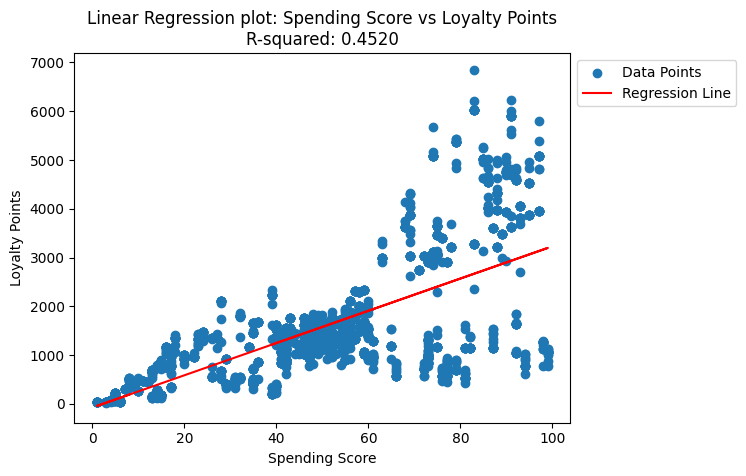

<Figure size 640x480 with 0 Axes>

In [22]:
# PLotting Spending Score vs Loyalty Points
# Independent variable.
x = reviews1['spending_score'] 
# Dependent variable.
y = reviews1['loyalty_points']

plot_regression_line(x, y, y_label='Loyalty Points', x_label='Spending Score', 
                     title='Linear Regression plot: Spending Score vs Loyalty Points')

# Save the plot to a PNG file
plt.savefig('Linear Regression plot Spending Score vs Loyalty Points.png')
plt.show()

### 
###

### 5b) Renumeration vs Loyalty

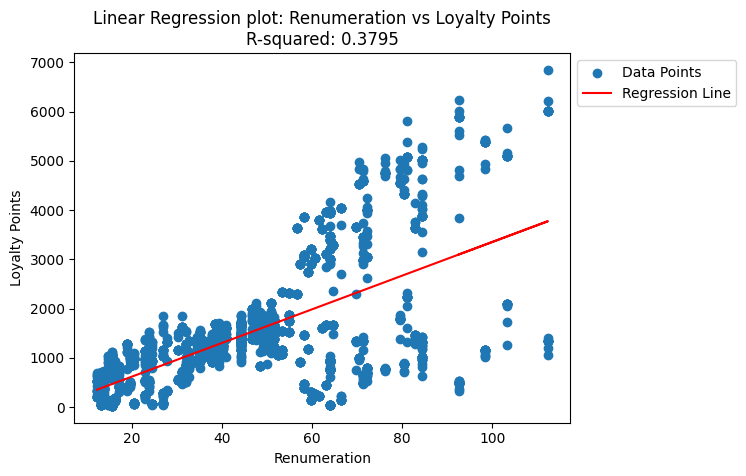

In [23]:
# Independent variable.
x = reviews1['renumeration'] 
# Dependent variable.
y = reviews1['loyalty_points']

plot_regression_line(x, y, x_label='Renumeration', 
                     y_label='Loyalty Points', title='Linear Regression plot: Renumeration vs Loyalty Points')

###
###
###

### 5c) Age vs Loyalty

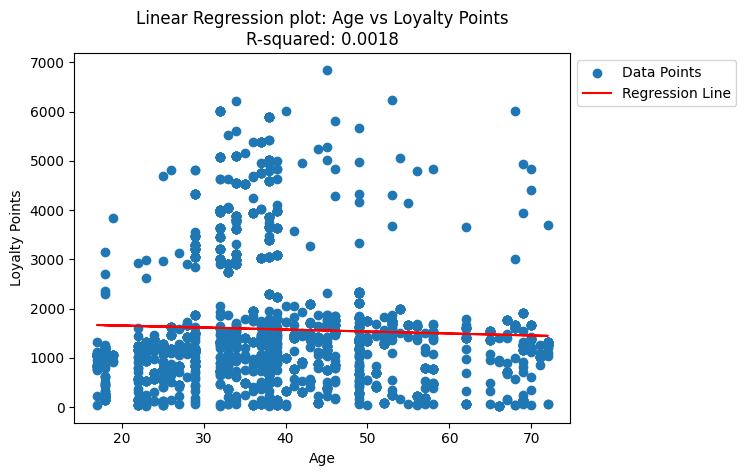

In [24]:
# Independent variable.
x = reviews1['age'] 
# Dependent variable.
y = reviews1['loyalty_points']

plot_regression_line(x, y, x_label='Age', 
                     y_label='Loyalty Points', title='Linear Regression plot: Age vs Loyalty Points')

###
###

## 6. Observations and insights

***Your observations here...***






# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [25]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [26]:
# Load the CSV file(s) as df2.
# Import new CSV file with Pandas.
df2 = pd.read_csv('Reviewdropped1.csv')

# View DataFrame.
df2

Unnamed: 0  gender  age  renumeration  spending_score  loyalty_points
0              0    Male   18         12.30              39             210
1              1    Male   23         12.30              81             524
2              2  Female   22         13.12               6              40
3              3  Female   25         13.12              77             562
4              4  Female   33         13.94              40             366
...          ...     ...  ...           ...             ...             ...
1995        1995  Female   37         84.46              69            4031
1996        1996  Female   43         92.66               8             539
1997        1997    Male   34         92.66              91            5614
1998        1998    Male   34         98.40              16            1048
1999        1999    Male   32         92.66               8             479

[2000 rows x 6 columns]

In [27]:
# I decided to keep additional columns in order to perform some additional exploratory analysis.
# Prepare data for clustering. Drop unwanted columns.
# Create a copy of the data dataframe but drops customerid
df2 = df2.drop(columns=['Unnamed: 0']).copy() 

# View DataFrame.
df2.head()

gender  age  renumeration  spending_score  loyalty_points
0    Male   18         12.30              39             210
1    Male   23         12.30              81             524
2  Female   22         13.12               6              40
3  Female   25         13.12              77             562
4  Female   33         13.94              40             366

In [28]:
df2a = df2.copy()

# Drop columns 'gender', 'age', 'loyalty_points' from df2a to create a column with those required only
columns_to_drop = ['gender', 'age', 'loyalty_points']
df2a = df2a.drop(columns=columns_to_drop)

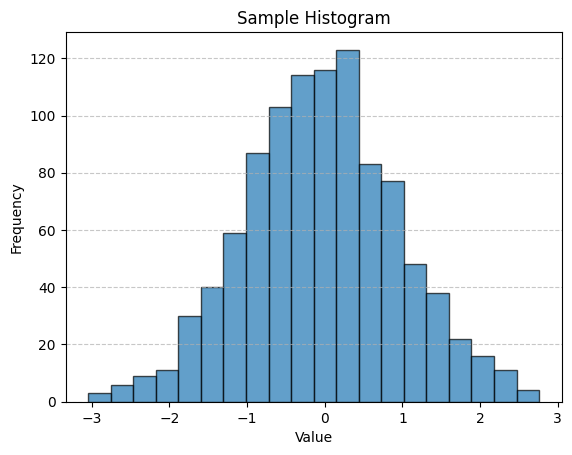

In [29]:
def create_histogram(data, title='Histogram', x_label='Value', y_label='Frequency', num_bins=10):
    plt.hist(data, bins=num_bins, edgecolor='k', alpha=0.7)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Example usage:
if __name__ == "__main__":
    import numpy as np
    np.random.seed(0)
    data = np.random.randn(1000)  
    create_histogram(data, title='Sample Histogram', x_label='Value', y_label='Frequency', num_bins=20)

Text(0, 0.5, 'Count')

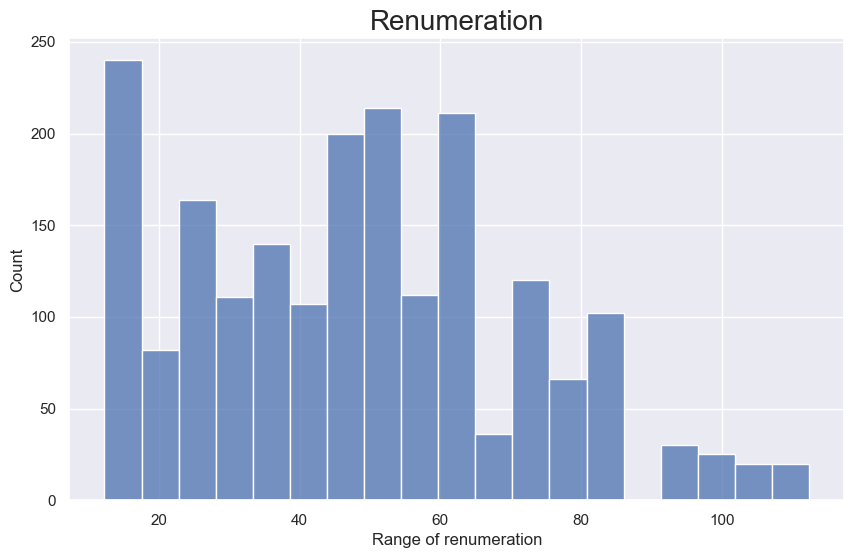

In [30]:
# Explore the data.
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'darkgrid')
sns.histplot(df2['renumeration'])
plt.title('Renumeration', fontsize = 20)
plt.xlabel('Range of renumeration')
plt.ylabel('Count')

### Looks like most of the renumeration falls between 10-80K range


Text(0, 0.5, 'Count')

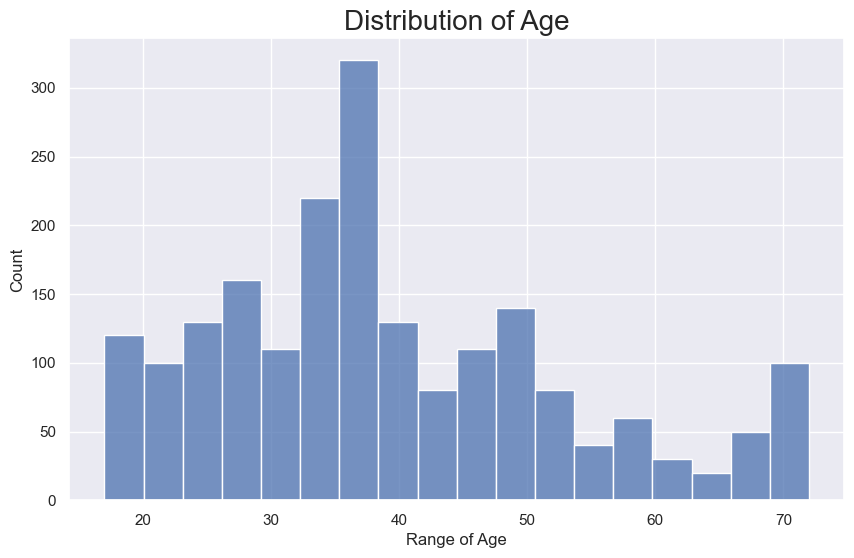

In [31]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'darkgrid')
sns.histplot(df2['age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

### There are customers of a wide variety of ages here, with the most prevelant 35-40.

Text(0, 0.5, 'Count')

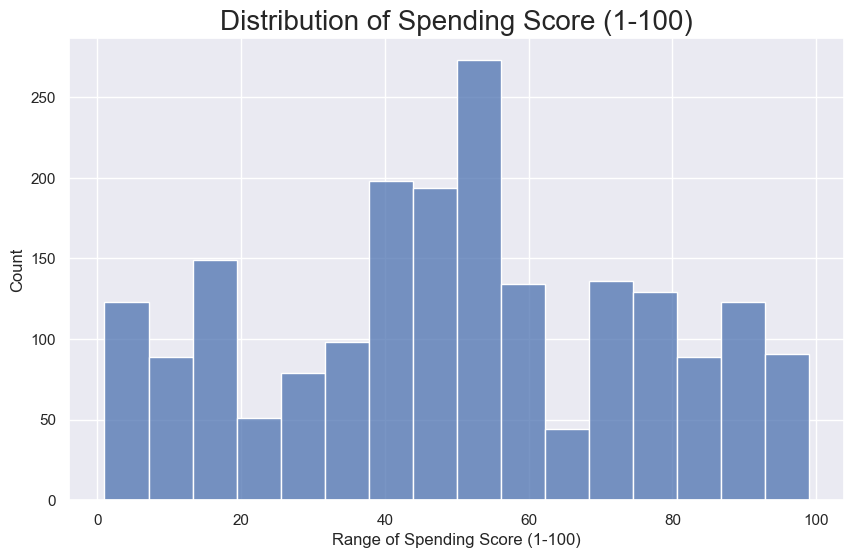

In [32]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'darkgrid')
sns.histplot(df2['spending_score'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

### Spending score around 40 - 60 is popular.

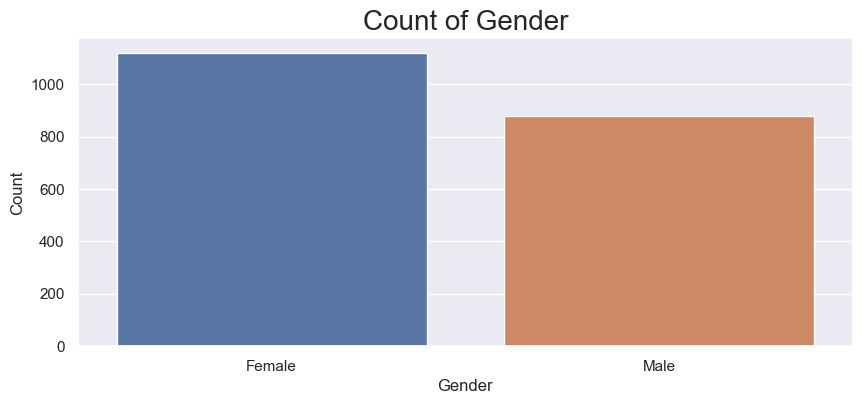

In [33]:
#Gender Analysis:
genders = df2.gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.title('Count of Gender', fontsize = 20)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### There are more females than males

In [34]:
# Descriptive statistics.


###
###

## 2. Plot

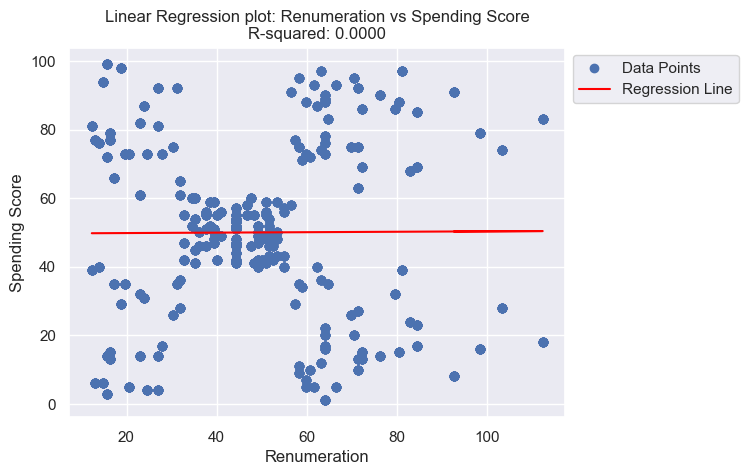

In [35]:
# Create a scatterplot Renumeration vs Spending Score
# Independent variable.
x = reviews1['renumeration'] 
# Dependent variable.
y = reviews1['spending_score']

plot_regression_line(x, y, x_label='Renumeration', 
                     y_label='Spending Score', title='Linear Regression plot: Renumeration vs Spending Score')

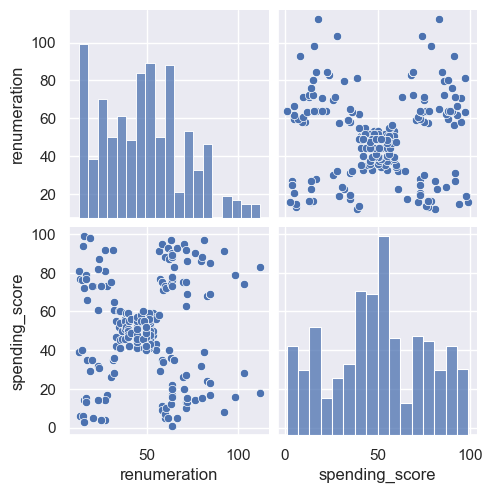

In [36]:
# Create a pairplot with Seaborn.
sns.pairplot(df2a)
plt.show()

#### We can see that there is some grouping already by looking at the realtionships in this plot.


###
###

## 3. Elbow and silhoutte methods with evaluation of the k-means model at different values of *k*

## Silhoutte method

In [37]:
# Clustering on the Renumeration and Spending score using the the silhouette method
df3=df2[['renumeration','spending_score']]
#The input data
df3.head()

renumeration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40

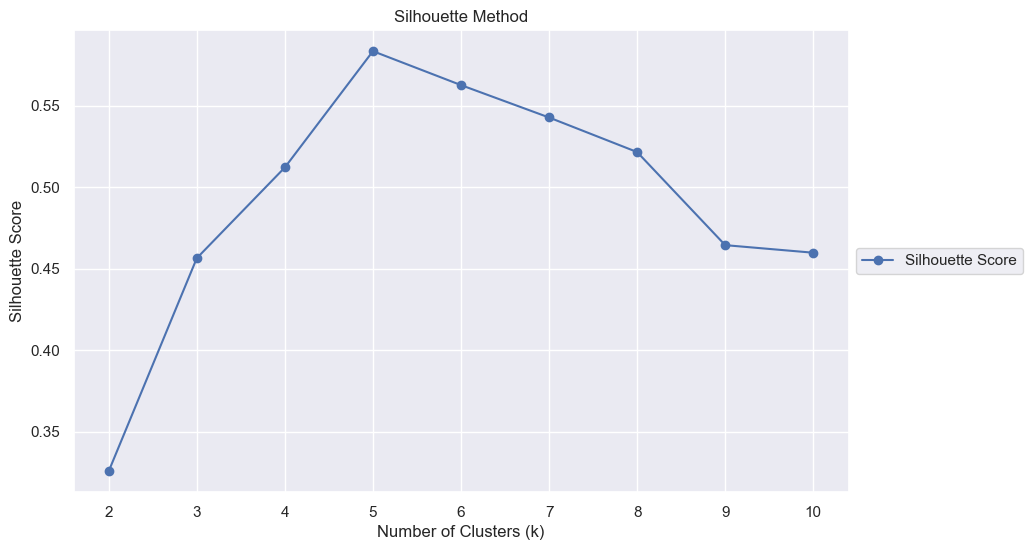

In [38]:
# Creating a function for the silhouette method

def plot_silhouette_scores(df, max_clusters=10):
    # Create an empty list to store silhouette scores
    silhouette_scores = []

    # Loop through different values of k
    for k in range(2, max_clusters + 1):
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        km.fit(df)
        y_pred = km.predict(df)

        silhouette_avg = silhouette_score(df, y_pred)
        silhouette_scores.append(silhouette_avg)

    # Plot the silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', label='Silhouette Score')
    plt.title('Silhouette Method')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.xticks(range(2, max_clusters + 1))

    # Add a legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()


plot_silhouette_scores(df3, max_clusters=10)


#### The peak is at 5 in this method; a higher silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

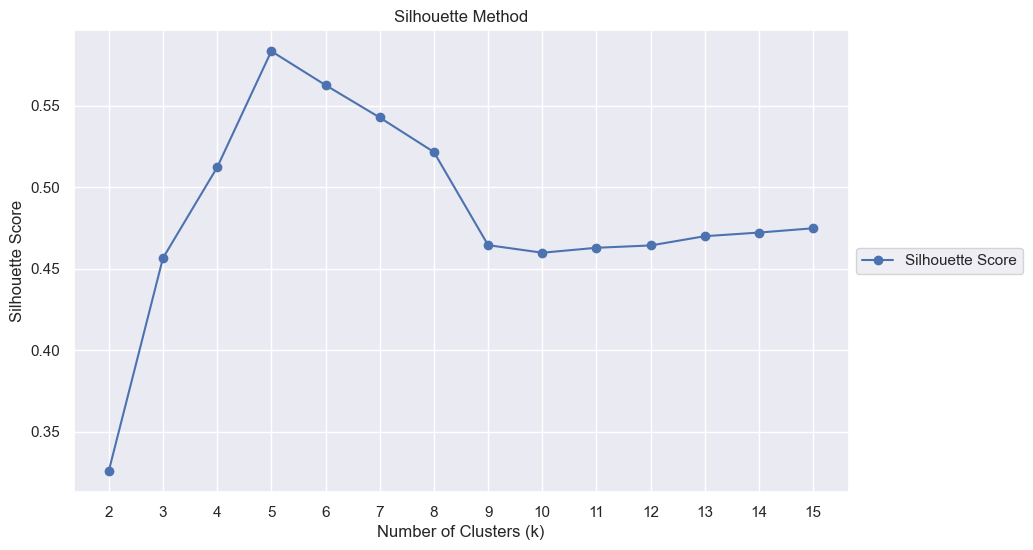

In [39]:
plot_silhouette_scores(df3, max_clusters=15)


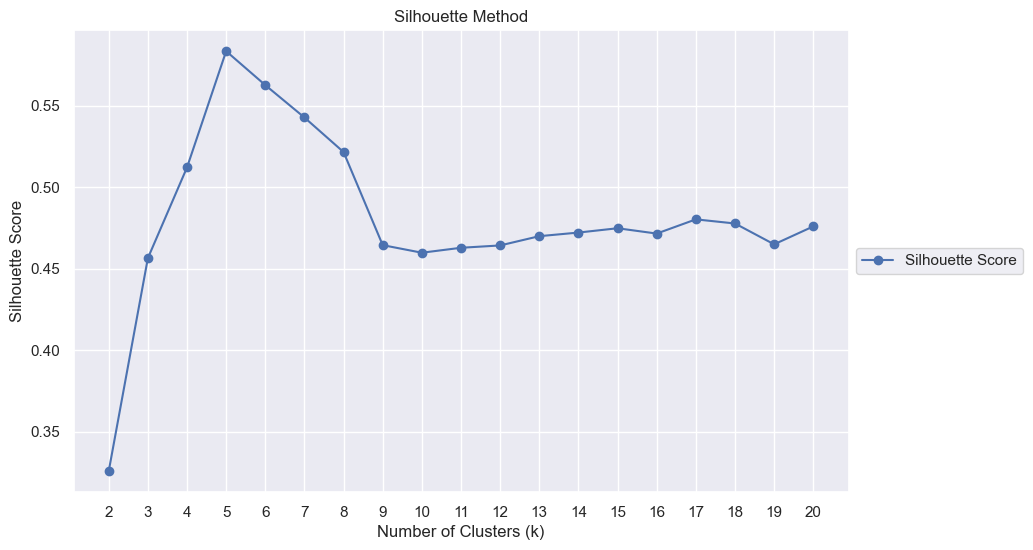

In [40]:
plot_silhouette_scores(df3, max_clusters=20)

####

### Plotting the optimum value of k using the silohette method

In [41]:
# Create a copy of df3
df3a = df3.copy()  

# Now, let's take 5 clusters
km1 = KMeans(n_clusters=5, n_init=10)

# Fitting the input data
km1.fit(df3a)  

# Predicting the clusters of the input data
y = km1.predict(df3a)

In [42]:
# Adding the clusters to a column named label
df3a["cluster label"] = y
# Viewing the different clusters
df3a.head()

renumeration  spending_score  cluster label
0         12.30              39              3
1         12.30              81              0
2         13.12               6              3
3         13.12              77              0
4         13.94              40              3

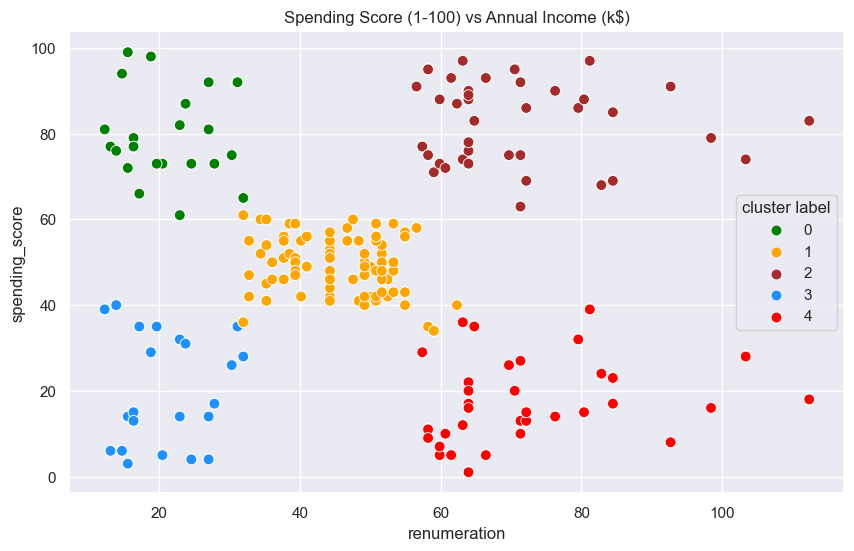

In [43]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'renumeration',y = 'spending_score',hue="cluster label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df3a  ,s = 60 )
plt.xlabel('renumeration')
plt.ylabel('spending_score') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

###
###

## Elbow method

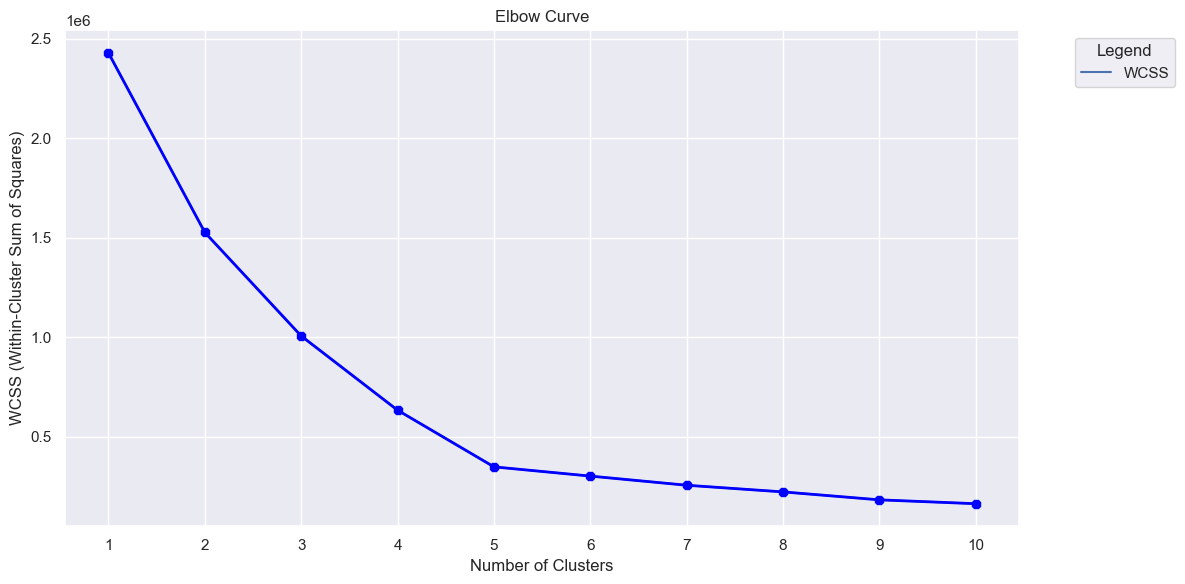

In [44]:
# Creating a function for the elbow method

def plot_elbow_curve(data, max_clusters=10):
    wcss = []

    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(range(1, max_clusters + 1), wcss, label='WCSS')
    ax1.plot(range(1, max_clusters + 1), wcss, linewidth=2, color="blue", marker="8")
    ax1.set_xlabel("Number of Clusters")
    ax1.set_xticks(np.arange(1, max_clusters + 1, 1))
    ax1.set_ylabel("WCSS (Within-Cluster Sum of Squares)")
    ax1.set_title('Elbow Curve')
    
    # Create a legend outside the plot area
    legend = plt.legend(loc='upper left', title='Legend', bbox_to_anchor=(1.05, 1))
    
    plt.tight_layout()
    plt.show()


plot_elbow_curve(df3, max_clusters=10)


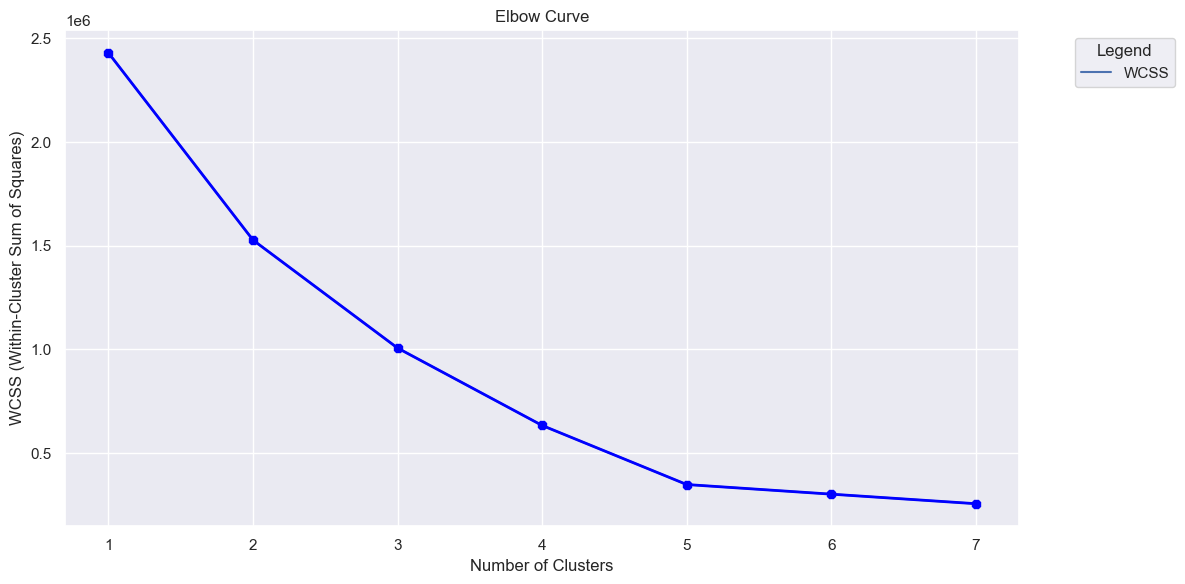

In [45]:
plot_elbow_curve(df3, max_clusters=7)

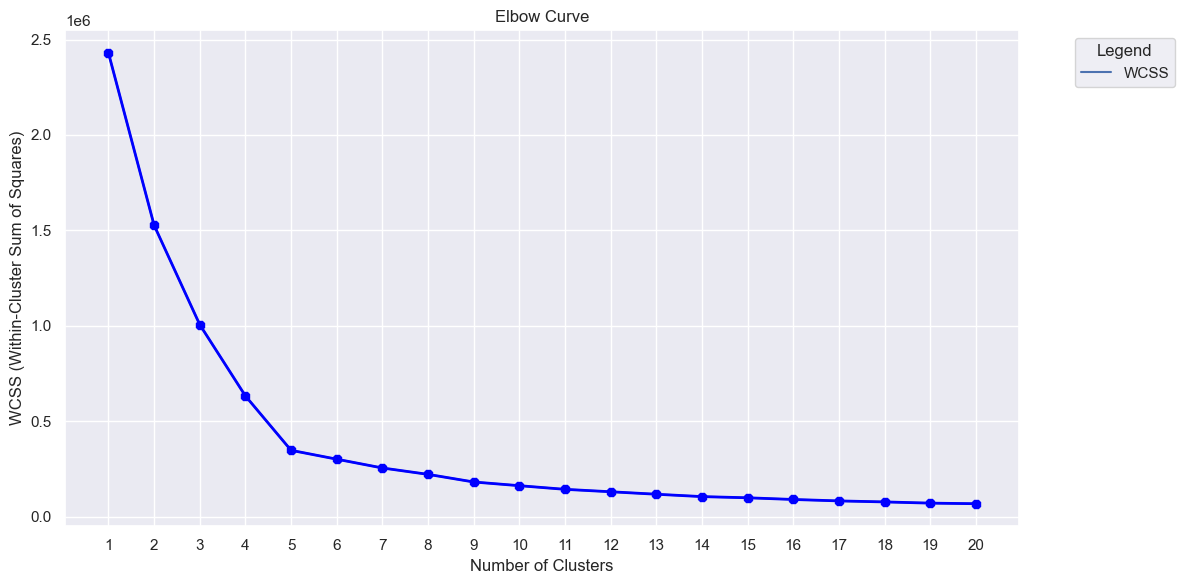

In [46]:
plot_elbow_curve(df3, max_clusters=20)

#### The point on the curve where the rate of decrease in WCSS (Within-Cluster Sum of Squares) starts to slow down is 5. This point resembles an "elbow" in the curve.
####

####

###
###

### Plotting the optimum value of k using the silohette method
#### Again, let's use 5 clusters. We choose the k for which WSS starts to significantly reduce.

In [47]:
# Drop unnecessary columns. This time keeping age, renumeration and	spending score
# Create a copy of the data dataframe but drops customerid
df4 = df2.drop(columns=['loyalty_points', 'gender']).copy() 


# View DataFrame.
df4.head()

age  renumeration  spending_score
0   18         12.30              39
1   23         12.30              81
2   22         13.12               6
3   25         13.12              77
4   33         13.94              40

In [48]:
from sklearn.cluster import KMeans

# Initialize the K-means model with the desired number of clusters 
km = KMeans(n_clusters=5, init='k-means++')

# Fit the K-means model
y = km.fit_predict(df4)

# Add the predicted cluster labels to your DataFrame as a new column named "label"
df4["label"] = y

# Display the DataFrame with cluster labels
df4.head()

age  renumeration  spending_score  label
0   18         12.30              39      0
1   23         12.30              81      4
2   22         13.12               6      0
3   25         13.12              77      4
4   33         13.94              40      0

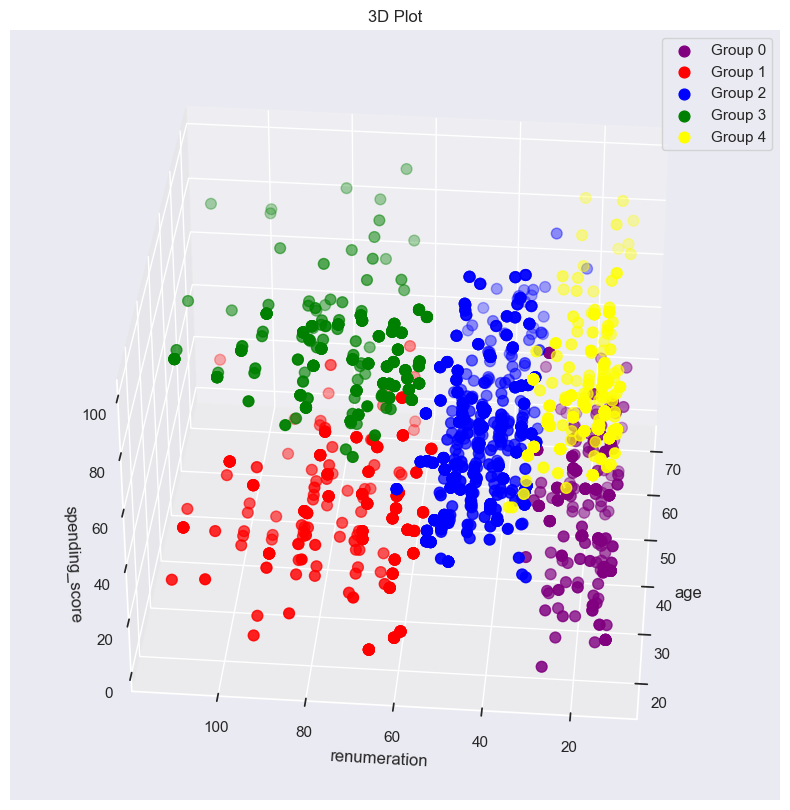

<Figure size 640x480 with 0 Axes>

In [49]:
# Here is a 3D Plot as we did the clustering on the basis of 3 input features
from mpl_toolkits.mplot3d import Axes3D
# Create a figure and 3D subplot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
# Scatter plots for each group with labels
ax.scatter(df4.age[df4.label == 0], df4["renumeration"][df4.label == 0], df4["spending_score"][df4.label == 0], c='purple', s=60, label='Group 0')
ax.scatter(df4.age[df4.label == 1], df4["renumeration"][df4.label == 1], df4["spending_score"][df4.label == 1], c='red', s=60, label='Group 1')
ax.scatter(df4.age[df4.label == 2], df4["renumeration"][df4.label == 2], df4["spending_score"][df4.label == 2], c='blue', s=60, label='Group 2')
ax.scatter(df4.age[df4.label == 3], df4["renumeration"][df4.label == 3], df4["spending_score"][df4.label == 3], c='green', s=60, label='Group 3')
ax.scatter(df4.age[df4.label == 4], df4["renumeration"][df4.label == 4], df4["spending_score"][df4.label == 4], c='yellow', s=60, label='Group 4')
# Set the view
ax.view_init(35, 185)
# Set axis labels and title
plt.xlabel("age")
plt.ylabel("renumeration")
ax.set_zlabel('spending_score')
plt.title('3D Plot')
# Add legend
ax.legend()
# Show the plot
plt.show()

# Save the plot to a PNG file
plt.savefig('Linear Regression plot Spending Score vs Loyalty Points.jpg')
plt.show()

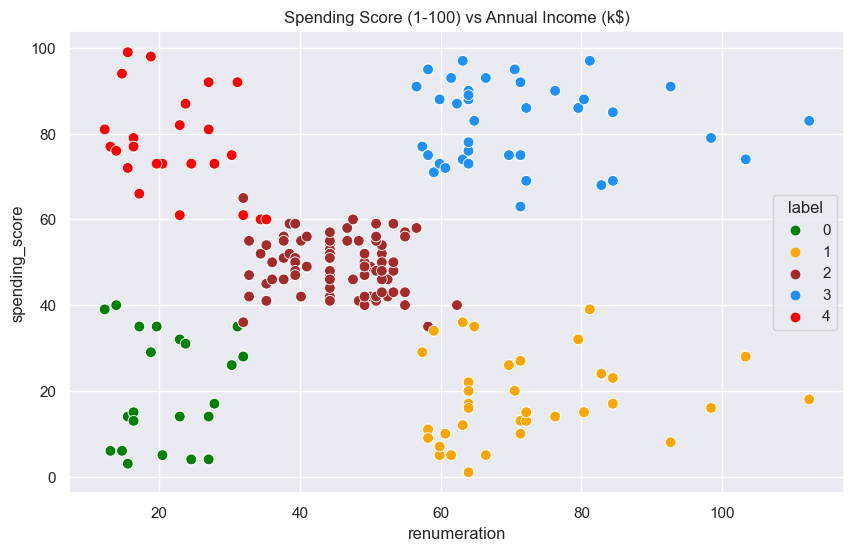

In [50]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'renumeration',y = 'spending_score',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df4  ,s = 60 )
plt.xlabel('renumeration')
plt.ylabel('spending_score') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

##
##

## 5. Fit final model and justify your choice and plot and interpret the clusters

In [51]:
# Apply the final model.
final_cluster_labels = km1.fit_predict(df4)
# Add the predicted cluster labels to your DataFrame
df4['final_label'] = final_cluster_labels
df4.head()

age  renumeration  spending_score  label  final_label
0   18         12.30              39      0            0
1   23         12.30              81      4            1
2   22         13.12               6      0            0
3   25         13.12              77      4            1
4   33         13.94              40      0            0

In [52]:
df4.drop(columns=['label']).head()

age  renumeration  spending_score  final_label
0   18         12.30              39            0
1   23         12.30              81            1
2   22         13.12               6            0
3   25         13.12              77            1
4   33         13.94              40            0

In [53]:
# Check the number of observations per predicted class.
class_counts = df4['final_label'].value_counts().sort_index()
print(class_counts)

final_label
0    270
1    268
2    356
3    769
4    337
Name: count, dtype: int64


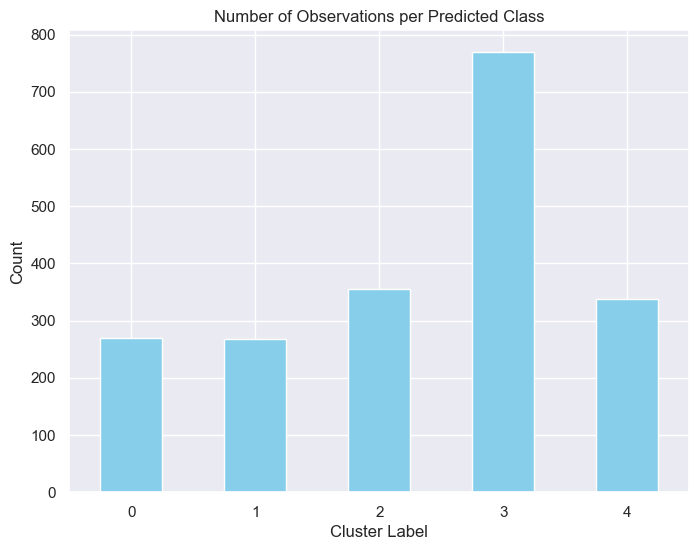

In [54]:
# Create a bar plot to show these results
plt.figure(figsize=(8, 6))
sns.set(style='darkgrid')
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Number of Observations per Predicted Class')
plt.xticks(rotation=0)  
plt.show()

In [55]:
inertias = []
for k in range(2, 11):
    km = KMeans(n_clusters=k)
    km.fit(df4)
    inertias.append(km.inertia_)

print("Inertias for different cluster numbers:", inertias)

Inertias for different cluster numbers: [1863894.8223031745, 1371889.63996866, 978917.162926888, 683216.5898969561, 542316.5693218192, 496348.58758155, 450491.29384953674, 410279.3308369438, 380449.51896576147]


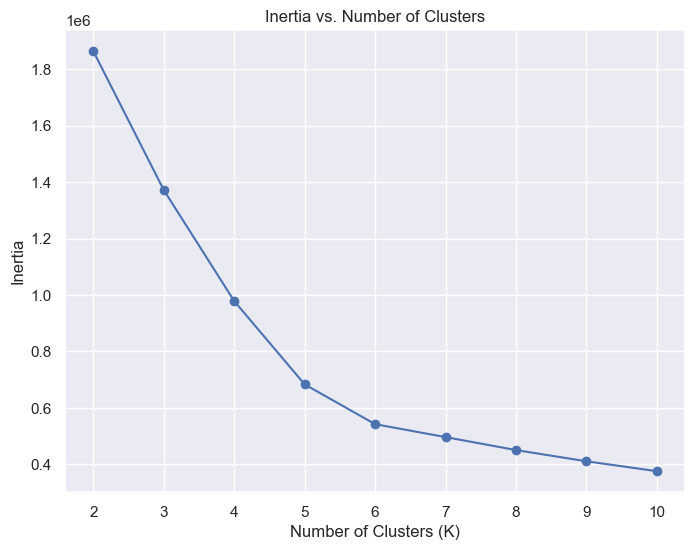

In [56]:
# Create an empty list to store the inertia values
inertias = []

# Define the range of cluster numbers you want to explore
cluster_range = range(2, 11)

# Calculate inertia for each cluster number
for k in cluster_range:
    km = KMeans(n_clusters=k)
    km.fit(df4)  
    inertias.append(km.inertia_)

# Plot the inertias
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertias, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.grid(True)
plt.show()


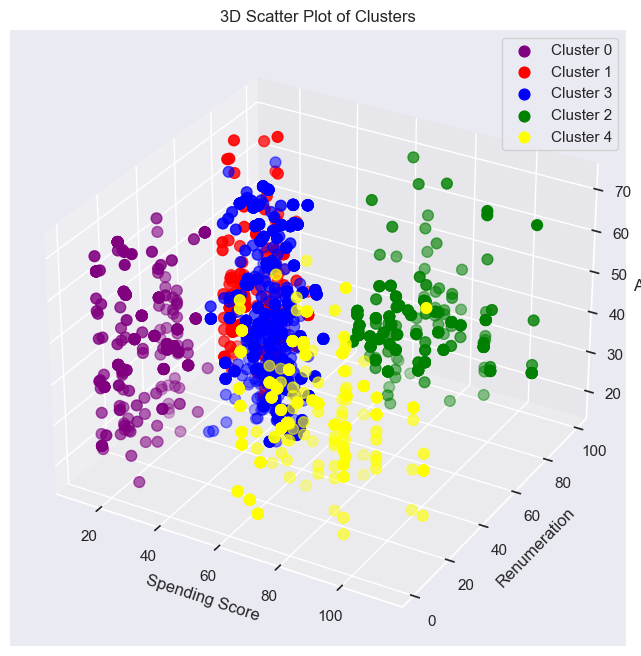

In [57]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each cluster
colors = ['purple', 'red', 'blue', 'green', 'yellow']

# Iterate through clusters and plot points with different colors
for cluster_label, color in zip(df4['final_label'].unique(), colors):
    cluster_data = df4[df4['final_label'] == cluster_label]
    ax.scatter(cluster_data['renumeration'], cluster_data['spending_score'],cluster_data['age'], c=color, s=60, label=f'Cluster {cluster_label}')

# Set axis labels
ax.set_xlabel('Spending Score')
ax.set_ylabel('Renumeration')
ax.set_zlabel('Age')

# Set plot title and legend
plt.title('3D Scatter Plot of Clusters')
ax.legend()

# Show the plot
plt.show()

#### I justified the choice of this fit after a visual inspection, using the elbow and silhouette scores and determining that they are clear to interpret, as the  clusters have clear and distinct characteristics which means they are meaningful and actionable. I also used the Inertia method which also gives and elbow point in the plot which, the number of clusters corresponding to that point is a reasonable choice.

###
###


####

###
###


## 7. Discuss: Insights and observations

***Your observations here...***

#### There are clear and distinct groups.
#### For instance the group who have high renumeration and a high spending score are not older. This group could be tartgeted with opportunities to maximise their spending score or utilise the spending score they have accumulated. 

#### The group with low renumeration and a low spending score could be segmented by using affordability in marketing propositions and pricing strategies for the budget concious buyer.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

In [58]:
###
# Import all the necessary packages.
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import re
nltk.download('wordnet')
# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from collections import Counter
from afinn import Afinn
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\j_ogl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##
##

## 1. Load and explore the data

In [59]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head(3)

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless

In [60]:
# Drop unnecessary columns.
dfr3 = reviews.drop(['gender','age','remuneration (k£)', 'spending_score (1-100)',
                               'loyalty_points', 'language', 'platform','education','product'] , axis=1)

# View column names.
dfr3.columns

Index(['review', 'summary'], dtype='object')

In [61]:
dfr3.head(2)

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...

In [62]:
# Check for nulls in the data
dfr3.isnull().sum()

review     0
summary    0
dtype: int64

In [63]:
#Check and correct the data type
dfr3 = dfr3.astype('|S')
dfr3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   |S8042
 1   summary  2000 non-null   |S8042
dtypes: bytes64336(2)
memory usage: 30.7 MB


In [64]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate('df3') 

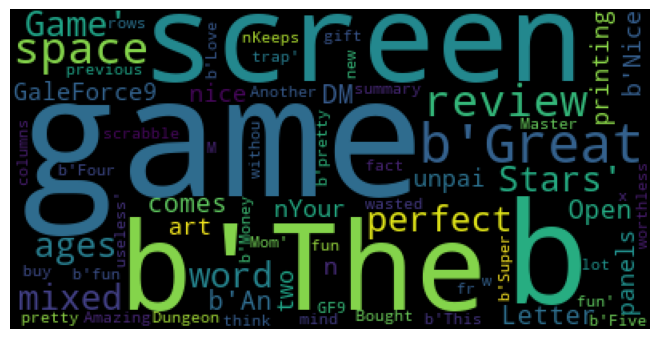

<Figure size 1600x900 with 0 Axes>

In [65]:
text = dfr3
wordcloud = WordCloud().generate(str(text))
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.figure(figsize = (16, 9), facecolor = None) 
plt.show()

##
##

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [66]:
# Drop unnecessary columns.
df4 = reviews.drop(['gender','age','remuneration (k£)', 'spending_score (1-100)',
                               'loyalty_points', 'language', 'platform','education','product'] , axis=1)

# View column names.
df4.columns

Index(['review', 'summary'], dtype='object')

In [67]:
# Transform data to lowercase.
df4['review'] = df4['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df4['review']

0       when it comes to a dm's screen, the space on t...
1       an open letter to galeforce9*: your unpainted ...
2       nice art, nice printing. why two panels are fi...
3       amazing buy! bought it as a gift for our new d...
4       as my review of gf9's previous screens these w...
                              ...                        
1995    the perfect word game for mixed ages (with mom...
1996    great game. did not think i would like it when...
1997    great game for all......... keeps the mind nim...
1998                                            fun game!
1999    this game is fun. a lot like scrabble without ...
Name: review, Length: 2000, dtype: object

In [68]:
# Transform data to lowercase.
df4['summary'] = df4['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df4['summary']

0       the fact that 50% of this space is wasted on a...
1       another worthless dungeon master's screen from...
2                         pretty, but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995       the perfect word game for mixed ages (with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

##
##


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [69]:
# Replace all the punctuations in review column.
# Remove punctuation.
df4['review'] = df4['review'].str.replace('[^\w\s]','')

# Preview the result.
df4['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [70]:
# Replace all the puncuations in summary column.
# Remove punctuation.
df4['summary'] = df4['summary'].str.replace('[^\w\s]','')

# Preview the result.
df4['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

##
##

### 2c) Drop duplicates in both columns

In [71]:
# Drop duplicates in both columns.
df4 = df4.drop_duplicates(subset=['summary'])

# View DataFrame.
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1402 entries, 0 to 1995
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   1402 non-null   object
 1   summary  1402 non-null   object
dtypes: object(2)
memory usage: 32.9+ KB


In [72]:
# Drop duplicates in both columns.
df4 = df4.drop_duplicates(subset=['review'])

# View DataFrame.
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1401 entries, 0 to 1995
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   1401 non-null   object
 1   summary  1401 non-null   object
dtypes: object(2)
memory usage: 32.8+ KB


In [73]:
# Remove punctuation.
df4['review'] = df4['review'].str.replace('[^\w\s]','')

# Preview the result.
df4['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [74]:
# Remove punctuation.
df4['summary'] = df4['summary'].str.replace('[^\w\s]','')

# Preview the result.
df4['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [75]:
df4.head()

review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

##
##

## 3. Tokenise and create wordclouds

In [76]:
# Tokenise the words.
# Create a copy of df4 to df4a
df4a = df4.copy()  

# Tokenize the 'review' column and assign it to 'tokens_r' in df4a
df4a['tokens_r'] = df4['review'].apply(word_tokenize)

# Preview data.
df4a['tokens_r'].head()

0    [when, it, comes, to, a, dm, 's, screen, ,, th...
1    [an, open, letter, to, galeforce9, *, :, your,...
2    [nice, art, ,, nice, printing, ., why, two, pa...
3    [amazing, buy, !, bought, it, as, a, gift, for...
4    [as, my, review, of, gf9, 's, previous, screen...
Name: tokens_r, dtype: object

In [77]:
# Tokenise the words.
df4a['tokens_s'] = df4['summary'].apply(word_tokenize)

# Preview data.
df4a['tokens_s'].head()

0    [the, fact, that, 50, %, of, this, space, is, ...
1    [another, worthless, dungeon, master, 's, scre...
2              [pretty, ,, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens_s, dtype: object

In [78]:
df4a.head()

review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   

                                             summary  \
0  the fact that 50% of this space is wasted on a...   
1  another worthless dungeon master's screen from...   
2                    pretty, but also pretty useless   
3                                         five stars   
4                                         money trap   

                                            tokens_r  \
0  [when, it, comes, to, a, dm, 's, screen, ,, th...   
1  [an, open, letter, to, galeforce9, *, :, your,...   
2  [nice, art, ,, nice, printing, ., why, two, pa...   
3  [amazing, buy, !, bought, it, as, a, gift, for...   
4  [as, my, review, of, gf9, 's, previous, screen...   

                                            tokens_s  
0  [the, fact, that, 50, %, of, this, space, is, ...  
1  [another, worthless, dungeon, master, 's, scre...  
2            [pretty, ,, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

In [79]:
df4b = df4a.copy()  
df4b = df4b.drop(['review','summary'] , axis=1)
df4b

tokens_r  \
0     [when, it, comes, to, a, dm, 's, screen, ,, th...   
1     [an, open, letter, to, galeforce9, *, :, your,...   
2     [nice, art, ,, nice, printing, ., why, two, pa...   
3     [amazing, buy, !, bought, it, as, a, gift, for...   
4     [as, my, review, of, gf9, 's, previous, screen...   
...                                                 ...   
1989  [this, is, a, fun, ``, card, '', game, for, pe...   
1990  [fun, for, the, family, ., just, make, certain...   
1992  [great, game, to, keep, the, mind, active, ., ...   
1994  [we, are, retired, and, find, this, a, great, ...   
1995  [the, perfect, word, game, for, mixed, ages, (...   

                                               tokens_s  
0     [the, fact, that, 50, %, of, this, space, is, ...  
1     [another, worthless, dungeon, master, 's, scre...  
2               [pretty, ,, but, also, pretty, useless]  
3                                         [five, stars]  
4                                         [money, trap]  
...                                                 ...  
1989  [this, is, a, fun, ``, card, '', game, for, pe...  
1990  [sort, of, a, card, game, equivalent, of, scra...  
1992         [great, game, to, keep, the, mind, active]  
1994                             [a, great, mind, game]  
1995  [the, perfect, word, game, for, mixed, ages, (...  

[1401 rows x 2 columns]

In [80]:
df4c = df4b.copy()  
# Create an empty string variable.
all_comments = ''
# Iterate through each row and concatenate tokens from 'tokens_r' and 'tokens_s' columns.
for index, row in df4c.iterrows():
    tokens_r = row['tokens_r']
    tokens_s = row['tokens_s']
    
    # Join the tokens in the current row with spaces and add them to all_comments.
    all_comments += ' '.join(tokens_r) + ' '
    all_comments += ' '.join(tokens_s) + ' '


all_comments = all_comments.strip()

In [81]:
all_comments

"when it comes to a dm 's screen , the space on the screen itself is at an absolute premium . the fact that 50 % of this space is wasted on art ( and not terribly informative or needed art as well ) makes it completely useless . the only reason that i gave it 2 stars and not 1 was that , technically speaking , it can at least still stand up to block your notes and dice rolls . other than that , it drops the ball completely . the fact that 50 % of this space is wasted on art ( and not terribly informative or needed art ... an open letter to galeforce9 * : your unpainted miniatures are very not bad . your spell cards are great . your board games are `` meh '' . your dm screens , however , are freaking terrible . i 'm still waiting for a single screen that is n't polluted with pointless artwork where useful , reference-able tables should be . once again , you 've created a single use screen that is only useful when running the `` storm king 's thunder '' adventure . even despite the fact 

In [82]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_comments) 

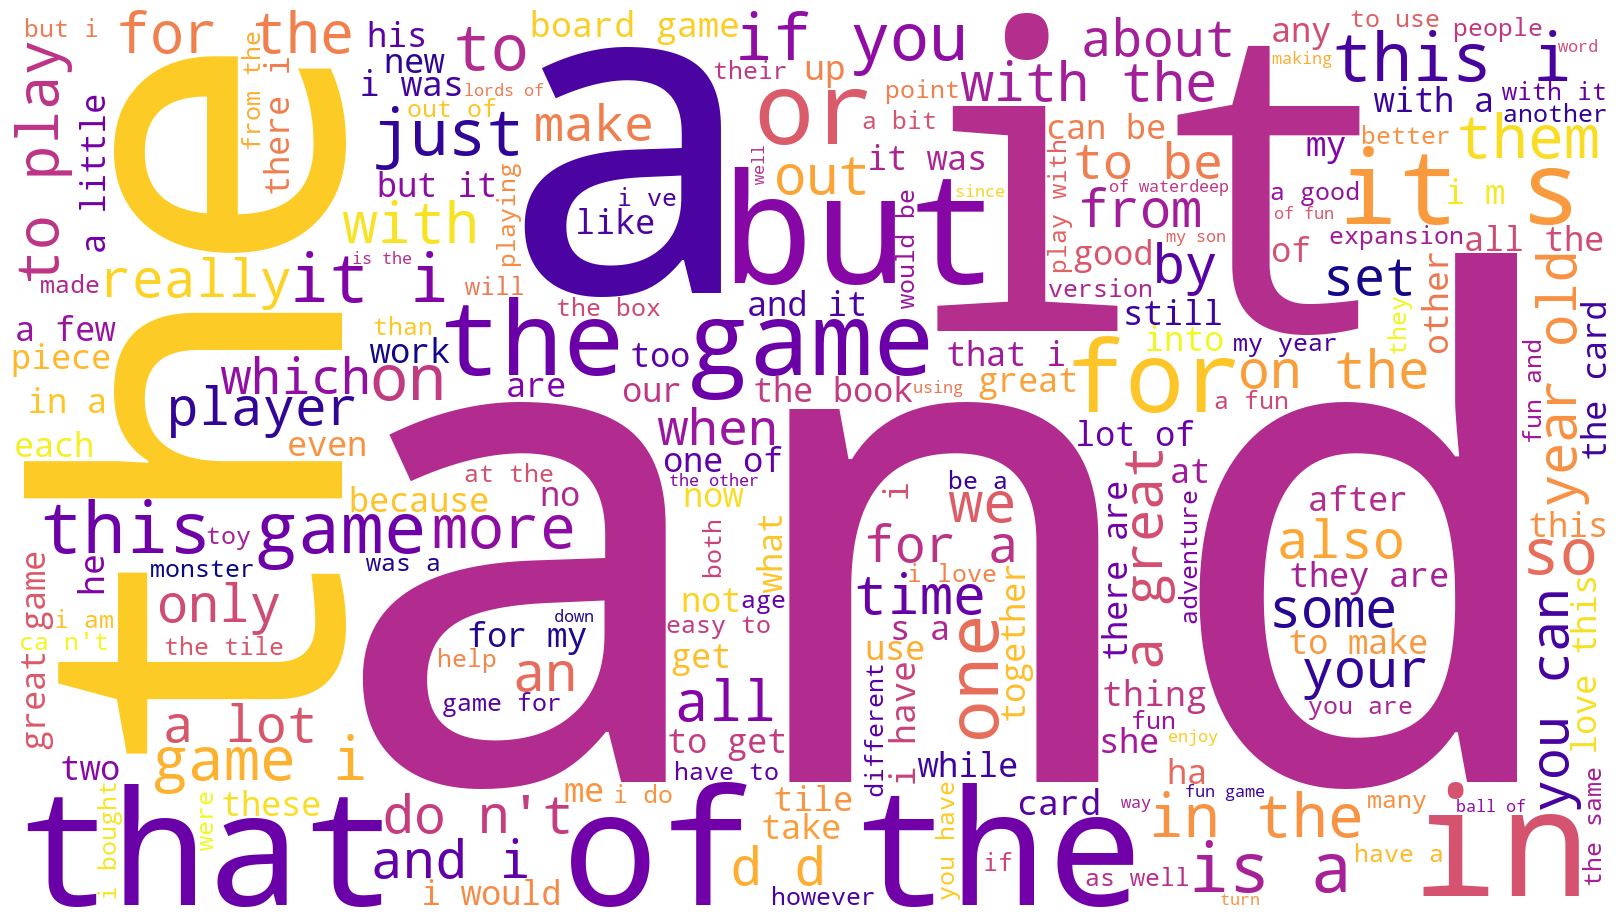

In [83]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

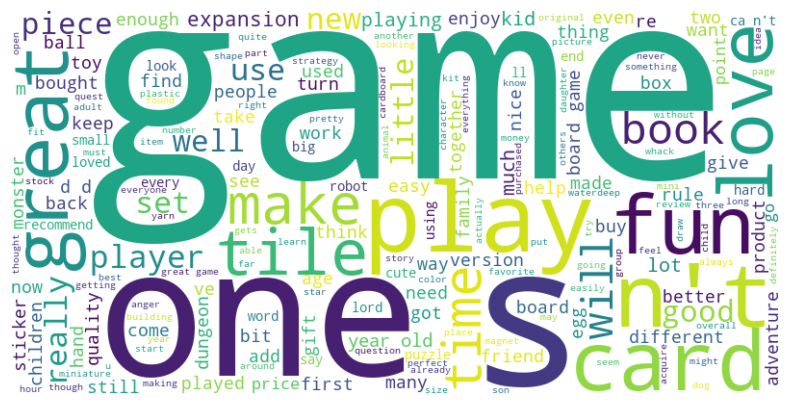

In [84]:
# crete wordcloud function
def generate_wordcloud(dataframe, column_name):
    # Combine all tokens in the column into a single string
    all_text = ' '.join([' '.join(tokens) for tokens in dataframe[column_name]])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud(df4b, 'tokens_r')


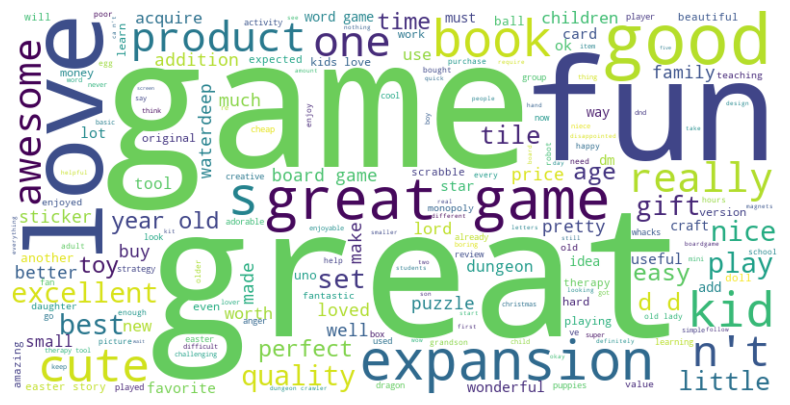

In [85]:
generate_wordcloud(df4b, 'tokens_s')

###
###

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [86]:
def calculate_word_frequency(df, column_name, top_n=10):
    # Tokenize the text from the specified column
    tokens = [token for comment_tokens in df[column_name] for token in comment_tokens if isinstance(comment_tokens, list)]
    
    # Create a frequency distribution from the tokens
    freq_dist = FreqDist(tokens)
    
    # Get the most common words and their frequencies
    most_common_words = freq_dist.most_common(top_n)
    
    # Create a DataFrame from the results
    word_frequency_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
    
    return word_frequency_df

word_frequency_df = calculate_word_frequency(df4b, 'tokens_r', top_n=10)
print(word_frequency_df)

  Word  Frequency
0    .       5890
1  the       5130
2    ,       3577
3  and       3028
4    a       2923
5   to       2917
6   of       2325
7   it       2258
8    i       2175
9   is       1692


In [87]:
word_frequency_df = calculate_word_frequency(df4b, 'tokens_s', top_n=10)
print(word_frequency_df)

    Word  Frequency
0      !        389
1   game        276
2    the        259
3  great        250
4      a        239
5    for        232
6      .        217
7     to        192
8    fun        182
9     it        177


#
#



### 4b) Remove alphanumeric characters and stopwords

In [88]:
# Check the dataframe 
df4b

tokens_r  \
0     [when, it, comes, to, a, dm, 's, screen, ,, th...   
1     [an, open, letter, to, galeforce9, *, :, your,...   
2     [nice, art, ,, nice, printing, ., why, two, pa...   
3     [amazing, buy, !, bought, it, as, a, gift, for...   
4     [as, my, review, of, gf9, 's, previous, screen...   
...                                                 ...   
1989  [this, is, a, fun, ``, card, '', game, for, pe...   
1990  [fun, for, the, family, ., just, make, certain...   
1992  [great, game, to, keep, the, mind, active, ., ...   
1994  [we, are, retired, and, find, this, a, great, ...   
1995  [the, perfect, word, game, for, mixed, ages, (...   

                                               tokens_s  
0     [the, fact, that, 50, %, of, this, space, is, ...  
1     [another, worthless, dungeon, master, 's, scre...  
2               [pretty, ,, but, also, pretty, useless]  
3                                         [five, stars]  
4                                         [money, trap]  
...                                                 ...  
1989  [this, is, a, fun, ``, card, '', game, for, pe...  
1990  [sort, of, a, card, game, equivalent, of, scra...  
1992         [great, game, to, keep, the, mind, active]  
1994                             [a, great, mind, game]  
1995  [the, perfect, word, game, for, mixed, ages, (...  

[1401 rows x 2 columns]

In [89]:
df4c = df4b.copy()  # Create a copy of df4b to df4c

# Function to preprocess text
def preprocess_text(tokens_list):
    # Combine the list of tokens into a single string
    text = ' '.join(tokens_list)
    
    # Remove alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Join the filtered tokens back into a string
    return ' '.join(filtered_tokens)

# Apply preprocessing to the 'tokens_r' column
df4c['cleaned_review'] = df4c['tokens_r'].apply(preprocess_text)

# Display the DataFrame with cleaned text
print(df4c)


                                               tokens_r  \
0     [when, it, comes, to, a, dm, 's, screen, ,, th...   
1     [an, open, letter, to, galeforce9, *, :, your,...   
2     [nice, art, ,, nice, printing, ., why, two, pa...   
3     [amazing, buy, !, bought, it, as, a, gift, for...   
4     [as, my, review, of, gf9, 's, previous, screen...   
...                                                 ...   
1989  [this, is, a, fun, ``, card, '', game, for, pe...   
1990  [fun, for, the, family, ., just, make, certain...   
1992  [great, game, to, keep, the, mind, active, ., ...   
1994  [we, are, retired, and, find, this, a, great, ...   
1995  [the, perfect, word, game, for, mixed, ages, (...   

                                               tokens_s  \
0     [the, fact, that, 50, %, of, this, space, is, ...   
1     [another, worthless, dungeon, master, 's, scre...   
2               [pretty, ,, but, also, pretty, useless]   
3                                         [five, stars]

In [90]:
# Delete all the alphanumeric and stopwords
# Apply preprocessing to the 'summary' column
df4c['cleaned_summary'] = df4c['tokens_s'].apply(preprocess_text)

# Display the DataFrame with cleaned text
print(df4c)


                                               tokens_r  \
0     [when, it, comes, to, a, dm, 's, screen, ,, th...   
1     [an, open, letter, to, galeforce9, *, :, your,...   
2     [nice, art, ,, nice, printing, ., why, two, pa...   
3     [amazing, buy, !, bought, it, as, a, gift, for...   
4     [as, my, review, of, gf9, 's, previous, screen...   
...                                                 ...   
1989  [this, is, a, fun, ``, card, '', game, for, pe...   
1990  [fun, for, the, family, ., just, make, certain...   
1992  [great, game, to, keep, the, mind, active, ., ...   
1994  [we, are, retired, and, find, this, a, great, ...   
1995  [the, perfect, word, game, for, mixed, ages, (...   

                                               tokens_s  \
0     [the, fact, that, 50, %, of, this, space, is, ...   
1     [another, worthless, dungeon, master, 's, scre...   
2               [pretty, ,, but, also, pretty, useless]   
3                                         [five, stars]

In [91]:
# Remove all the stopwords
df4d = df4c.copy()  
df4d = df4d.drop(['tokens_s','tokens_r'] , axis=1)
df4d

cleaned_review  \
0     comes dm screen space screen absolute premium ...   
1     open letter galeforce unpainted miniatures bad...   
2     nice art nice printing two panels filled gener...   
3                amazing buy bought gift new dm perfect   
4     review gf previous screens completely unnecess...   
...                                                 ...   
1989  fun card game people like words artwork cards ...   
1990  fun family make certain agree dictionary front...   
1992  great game keep mind active play year old moth...   
1994  retired find great way stay alert spelling voc...   
1995  perfect word game mixed ages mom perhaps givin...   

                                        cleaned_summary  
0     fact space wasted art terribly informative nee...  
1     another worthless dungeon master screen galeforce  
2                            pretty also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1989                    fun card game people like words  
1990      sort card game equivalent scrabble lot easier  
1992                        great game keep mind active  
1994                                    great mind game  
1995                   perfect word game mixed ages mom  

[1401 rows x 2 columns]

###

### 4c) Create wordcloud without stopwords

In [92]:
df4d['cleaned_review'] = df4d['cleaned_review']

# Preview data
print(df4d.head())


                                      cleaned_review  \
0  comes dm screen space screen absolute premium ...   
1  open letter galeforce unpainted miniatures bad...   
2  nice art nice printing two panels filled gener...   
3             amazing buy bought gift new dm perfect   
4  review gf previous screens completely unnecess...   

                                     cleaned_summary  
0  fact space wasted art terribly informative nee...  
1  another worthless dungeon master screen galeforce  
2                         pretty also pretty useless  
3                                         five stars  
4                                         money trap  


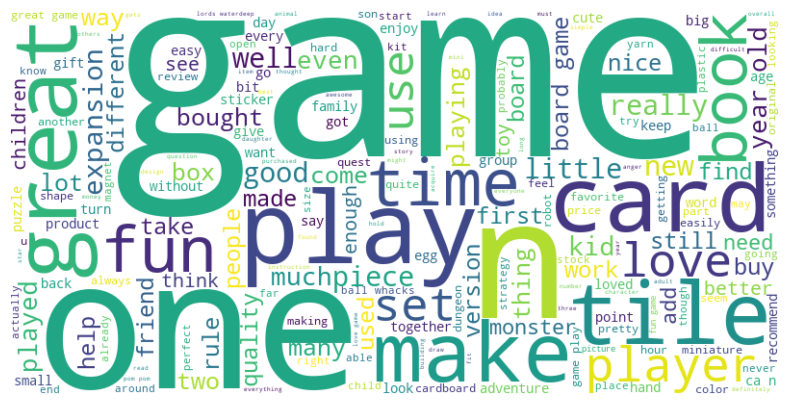

In [93]:
def generate_wordcloud(dataframe, column_name):
    # Tokenize the specified column using NLTK's word_tokenize
    dataframe['tokenized_text'] = dataframe[column_name].apply(word_tokenize)

    # Combine all tokens in the specified column into a single string
    all_text = ' '.join([' '.join(tokens) for tokens in dataframe['tokenized_text']])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud(df4d, 'cleaned_review')

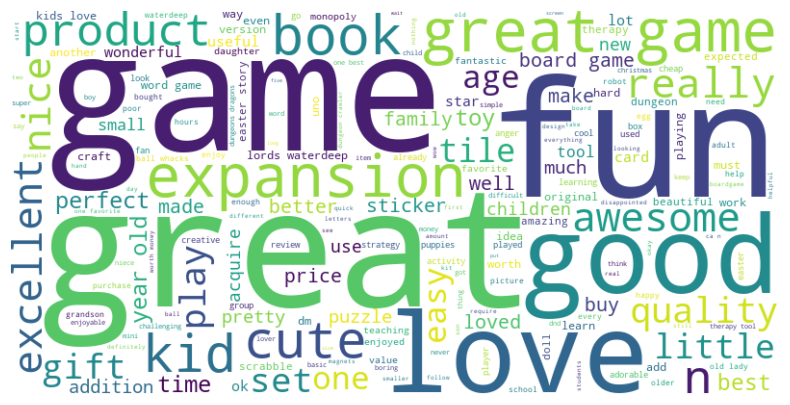

<Figure size 640x480 with 0 Axes>

In [94]:
# Plot the wordcloud image.
generate_wordcloud(df4d, 'cleaned_summary')
save_path = 'C:\\Users\\j_ogl\\Documents\\wordcloud.png'
plt.show()
# Save the word cloud as a PNG file
plt.savefig(save_path, bbox_inches='tight')


##
##

In [95]:
df4e = df4d.copy() 
# use lemmatisation to ascertain the difference in results that method produces.
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a text
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply the lemmatize_text function to the 'cleaned_review' column
df4e['lemmatized_review'] = df4e['cleaned_review'].apply(lemmatize_text)

# Apply the lemmatize_text function to the 'cleaned_summary' column
df4e['lemmatized_summary'] = df4e['cleaned_summary'].apply(lemmatize_text)


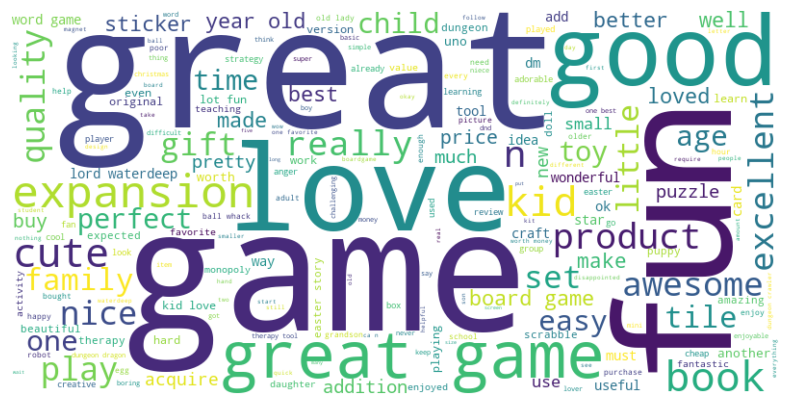

In [96]:
# Plot the wordcloud image.
generate_wordcloud(df4e, 'lemmatized_summary')

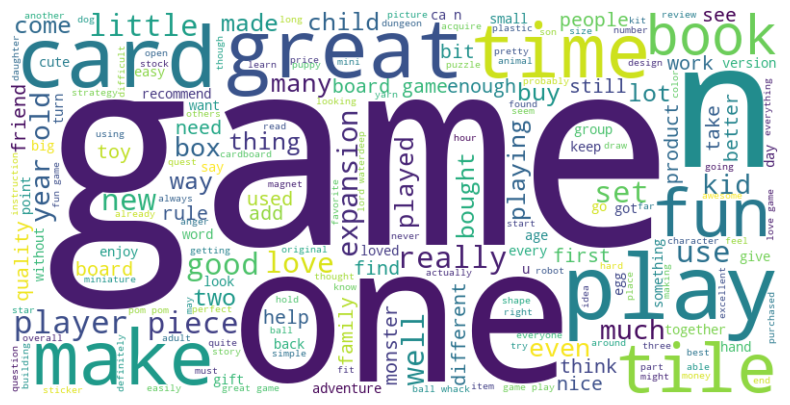

In [97]:
generate_wordcloud(df4e, 'lemmatized_review')

#### From these results the lemmatisation did not have a significant impact on the word cloud output.

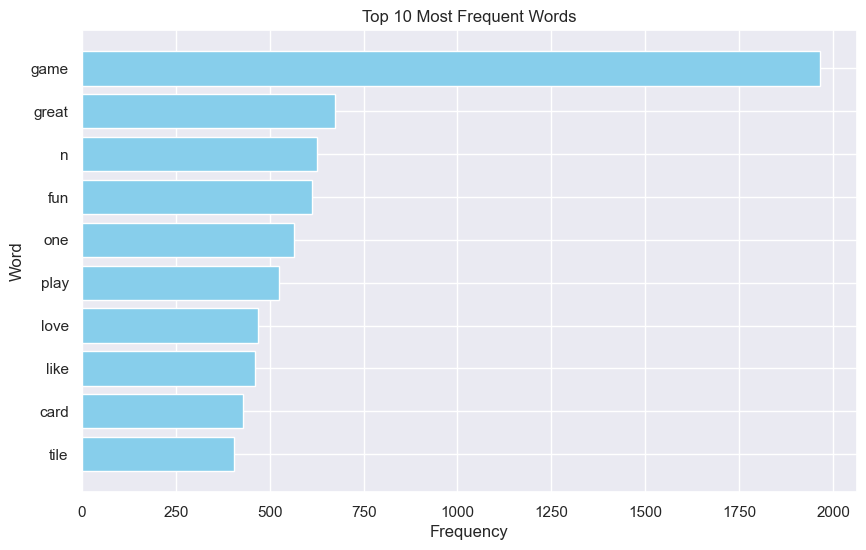

    Word  Frequency
0   game       1965
1  great        673
2      n        626
3    fun        613
4    one        565
5   play        526
6   love        470
7   like        462
8   card        430
9   tile        404


In [98]:
def text_mine_and_plot(dataframe, text_columns, top_n=10):
    # Initialize a Counter to store word frequencies
    word_freq = Counter()

    # Iterate over the specified text columns and tokenize the text
    for column in text_columns:
        # Tokenize and count word frequencies
        for text in dataframe[column]:
            tokens = text.split()  # Assuming words are separated by spaces
            word_freq.update(tokens)

    # Get the top N most frequent words
    top_words = word_freq.most_common(top_n)

    # Create a DataFrame from the top words
    top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

    # Create a bar plot to visualize the top words
    plt.figure(figsize=(10, 6))
    plt.barh(top_words_df['Word'], top_words_df['Frequency'], color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.title(f'Top {top_n} Most Frequent Words')
    plt.gca().invert_yaxis()  
    plt.show()

    return top_words_df

top_words_df = text_mine_and_plot(df4e, text_columns=['lemmatized_review', 'lemmatized_summary'], top_n=10)
print(top_words_df)

##### I undertook this analysis to understand the impact that the lemmatizer had made.

###
##

### 4d) Identify 15 most common words and polarity

In [99]:
# Determine the 15 most common words.

def get_top_words(dataframe, text_column, top_n=10):
    # Tokenize the text column and store the tokens in a new column 'tokens'
    dataframe['tokens'] = dataframe[text_column].apply(word_tokenize)

    # Combine all tokens into a single list
    all_tokens = [token for sublist in dataframe['tokens'] for token in sublist]

    # Calculate word frequencies
    word_freq = Counter(all_tokens)

    # Create a DataFrame from the word frequencies
    word_frequency_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

    # Sort the DataFrame by frequency in descending order
    word_frequency_df = word_frequency_df.sort_values(by='Frequency', ascending=False)

    # Return the top N most frequent words
    return word_frequency_df.head(top_n)


top_words = get_top_words(df4d, 'cleaned_summary', top_n=15)
print(top_words)


           Word  Frequency
38         game        277
23        great        252
96          fun        183
42         good         88
33         love         79
84         like         54
172        kids         51
1018  expansion         45
43         book         42
110        cute         41
51            n         40
100         old         37
73          one         30
123      really         30
31      product         30


In [100]:
top_words = get_top_words(df4d, 'cleaned_review', top_n=15)
print(top_words)

        Word  Frequency
119     game       1438
48         n        586
96       one        494
314     play        460
672      fun        430
38     great        421
196     like        388
288      get        300
37     cards        292
143   really        287
2848   tiles        286
116    would        282
219     book        264
138     time        256
12      well        255


In [101]:

def analyze_top_words_polarity(dataframe, text_column, top_n=15):
    # Load the AFINN lexicon
    afinn = Afinn()

    # Tokenize the text and count word frequencies
    dataframe['tokens'] = dataframe[text_column].apply(word_tokenize)
    all_tokens = [token for sublist in dataframe['tokens'] for token in sublist]
    word_freq = Counter(all_tokens)

    # Sort the words by frequency and get the top N
    top_words = word_freq.most_common(top_n)

    # Calculate the polarity score for each of the top N words
    word_polarity = {word: afinn.score(word) for word, _ in top_words}

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({'Word': [word for word, _ in top_words],
                               'Frequency': [frequency for _, frequency in top_words],
                               'Polarity': [word_polarity[word] for word, _ in top_words]})

    return results_df


top_words_polarity = analyze_top_words_polarity(df4d, text_column='cleaned_review', top_n=15)
# Display the results
print(top_words_polarity)


      Word  Frequency  Polarity
0     game       1438       0.0
1        n        586       0.0
2      one        494       0.0
3     play        460       0.0
4      fun        430       4.0
5    great        421       3.0
6     like        388       2.0
7      get        300       0.0
8    cards        292       0.0
9   really        287       0.0
10   tiles        286       0.0
11   would        282       0.0
12    book        264       0.0
13    time        256       0.0
14    well        255       0.0


In [102]:
top_words_polarity = analyze_top_words_polarity(df4d, text_column='cleaned_summary', top_n=15)

# Display the results
print(top_words_polarity)

         Word  Frequency  Polarity
0        game        277       0.0
1       great        252       3.0
2         fun        183       4.0
3        good         88       3.0
4        love         79       3.0
5        like         54       2.0
6        kids         51       0.0
7   expansion         45       0.0
8        book         42       0.0
9        cute         41       2.0
10          n         40       0.0
11        old         37       0.0
12    product         30       0.0
13        one         30       0.0
14     really         30       0.0


##
##

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [103]:
df4d

cleaned_review  \
0     comes dm screen space screen absolute premium ...   
1     open letter galeforce unpainted miniatures bad...   
2     nice art nice printing two panels filled gener...   
3                amazing buy bought gift new dm perfect   
4     review gf previous screens completely unnecess...   
...                                                 ...   
1989  fun card game people like words artwork cards ...   
1990  fun family make certain agree dictionary front...   
1992  great game keep mind active play year old moth...   
1994  retired find great way stay alert spelling voc...   
1995  perfect word game mixed ages mom perhaps givin...   

                                        cleaned_summary  \
0     fact space wasted art terribly informative nee...   
1     another worthless dungeon master screen galeforce   
2                            pretty also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1989                    fun card game people like words   
1990      sort card game equivalent scrabble lot easier   
1992                        great game keep mind active   
1994                                    great mind game   
1995                   perfect word game mixed ages mom   

                                         tokenized_text  \
0     [fact, space, wasted, art, terribly, informati...   
1     [another, worthless, dungeon, master, screen, ...   
2                       [pretty, also, pretty, useless]   
3                                         [five, stars]   
4                                         [money, trap]   
...                                                 ...   
1989             [fun, card, game, people, like, words]   
1990  [sort, card, game, equivalent, scrabble, lot, ...   
1992                  [great, game, keep, mind, active]   
1994                                [great, mind, game]   
1995            [perfect, word, game, mixed, ages, mom]   

                                                 tokens  
0     [fact, space, wasted, art, terribly, informati...  
1     [another, worthless, dungeon, master, screen, ...  
2                       [pretty, also, pretty, useless]  
3                                         [five, stars]  
4                                         [money, trap]  
...                                                 ...  
1989             [fun, card, game, people, like, words]  
1990  [sort, card, game, equivalent, scrabble, lot, ...  
1992                  [great, game, keep, mind, active]  
1994                                [great, mind, game]  
1995            [perfect, word, game, mixed, ages, mom]  

[1401 rows x 4 columns]

In [104]:
df4e = df4d.copy()  
df4e = df4e.drop(['tokenized_text', 'tokens'] , axis=1)
df4e

cleaned_review  \
0     comes dm screen space screen absolute premium ...   
1     open letter galeforce unpainted miniatures bad...   
2     nice art nice printing two panels filled gener...   
3                amazing buy bought gift new dm perfect   
4     review gf previous screens completely unnecess...   
...                                                 ...   
1989  fun card game people like words artwork cards ...   
1990  fun family make certain agree dictionary front...   
1992  great game keep mind active play year old moth...   
1994  retired find great way stay alert spelling voc...   
1995  perfect word game mixed ages mom perhaps givin...   

                                        cleaned_summary  
0     fact space wasted art terribly informative nee...  
1     another worthless dungeon master screen galeforce  
2                            pretty also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1989                    fun card game people like words  
1990      sort card game equivalent scrabble lot easier  
1992                        great game keep mind active  
1994                                    great mind game  
1995                   perfect word game mixed ages mom  

[1401 rows x 2 columns]

In [105]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

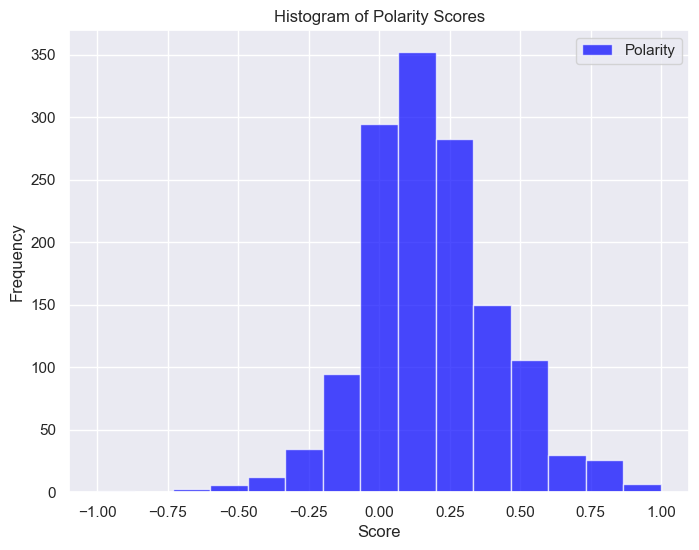

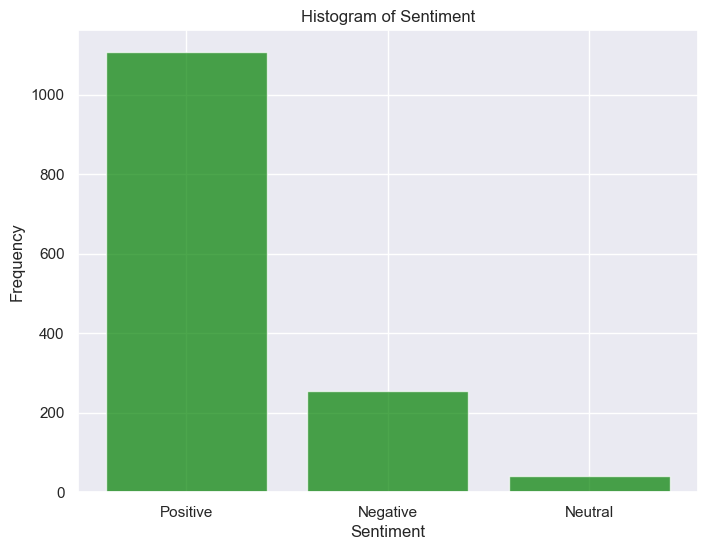

In [106]:
def analyze_text_sentiment(dataframe, text_column):
    # Load the AFINN lexicon
    afinn = Afinn()

    # Tokenize the text and calculate polarity scores
    dataframe['tokens'] = dataframe[text_column].apply(word_tokenize)
    dataframe['polarity'] = dataframe[text_column].apply(generate_polarity)

    # Create a histogram for polarity scores
    plt.figure(figsize=(8, 6))
    plt.hist(dataframe['polarity'], bins=15, color='blue', alpha=0.7, label='Polarity')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.title('Histogram of Polarity Scores')
    plt.legend()

    # Calculate sentiment based on polarity scores
    dataframe['sentiment'] = dataframe['polarity'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

    # Create a histogram for sentiment
    plt.figure(figsize=(8, 6))
    sentiment_counts = dataframe['sentiment'].value_counts()
    sentiment_labels = sentiment_counts.index
    plt.bar(sentiment_labels, sentiment_counts, color='green', alpha=0.7)
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.title('Histogram of Sentiment')
    plt.show()


analyze_text_sentiment(df4d, text_column='cleaned_review')


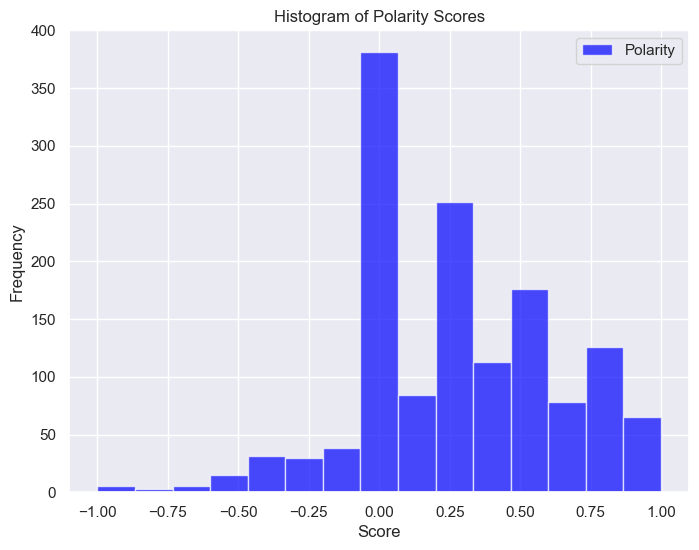

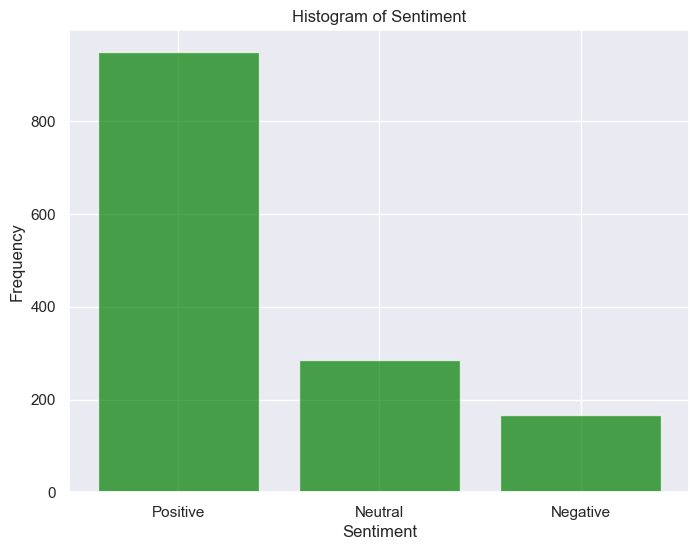

In [107]:
# Assuming df4c is your DataFrame with a 'cleaned_review' column containing text data
analyze_text_sentiment(df4d, text_column='cleaned_summary')

##
##

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [108]:
# Identify the top 20 positive and negative reviews
top_positive_reviews = df4d.nlargest(20, 'polarity')['cleaned_review']
top_negative_reviews = df4d.nsmallest(20, 'polarity')['cleaned_review']

# Identify the top 20 positive and negative summaries
top_positive_summaries = df4d.nlargest(20, 'polarity')['cleaned_summary']
top_negative_summaries = df4d.nsmallest(20, 'polarity')['cleaned_summary']

# Print or use the identified reviews and summaries as needed
print("Top 20 Positive Reviews:")
print(top_positive_reviews)

print("\nTop 20 Negative Reviews:")
print(top_negative_reviews)

print("\nTop 20 Positive Summaries:")
print(top_positive_summaries)

print("\nTop 20 Negative Summaries:")
print(top_negative_summaries)


Top 20 Positive Reviews:
6      bought many gm screens years one best ever see...
28     intricate designs older children adults book f...
32     awesome year old favorite xmas gift xmas morni...
80     daughter loves little books perfect size keep ...
134    occupied almost year old nearly hour stickers ...
140    bought year old daughter robot themed birthday...
161                year old son loves drawing book loves
187    great product took little practice time get ha...
210    skeptical year old much fun kit favorite chris...
475      great anger management game kiddos adults alike
543    great game play kids different ages really hel...
548    therapist children game valuable bring insight...
580    pigeon books elementary school library n pigeo...
599    wow product incredible hesitant purchase due p...
647    beautiful look forward easter story egg regula...
651    several different sets magnetic toys self cont...
657    son years months little advanced age puzzles r...
662   

In [109]:
# Create DataFrames for top positive and top negative reviews and summaries
top_positive_reviews_df = pd.DataFrame({'Review': top_positive_reviews, 'Summary': top_positive_summaries})
top_negative_reviews_df = pd.DataFrame({'Review': top_negative_reviews, 'Summary': top_negative_summaries})

# Define the Excel file names
output_file_positive = 'top_positive_reviews_and_summaries.xlsx'
output_file_negative = 'top_negative_reviews_and_summaries.xlsx'

# Export DataFrames to Excel files
with pd.ExcelWriter(output_file_positive) as writer_positive:
    top_positive_reviews_df.to_excel(writer_positive, sheet_name='Positive Reviews', index=False)
    top_positive_summaries.to_excel(writer_positive, sheet_name='Positive Summaries', index=False)

with pd.ExcelWriter(output_file_negative) as writer_negative:
    top_negative_reviews_df.to_excel(writer_negative, sheet_name='Negative Reviews', index=False)
    top_negative_summaries.to_excel(writer_negative, sheet_name='Negative Summaries', index=False)

print(f"Top positive reviews and summaries exported to {output_file_positive}")
print(f"Top negative reviews and summaries exported to {output_file_negative}")


Top positive reviews and summaries exported to top_positive_reviews_and_summaries.xlsx
Top negative reviews and summaries exported to top_negative_reviews_and_summaries.xlsx


##
##

## 7. Discuss: Insights and observations


##### I used of !pip install , the method for installing different packages e.g. Scikit-Learn on Jupyter notebook
##### I have taken these out but included this comment to demonstrate the learning. 

##### There were some reviews and summaries I read to check I agreed with the output decision that the model had made. 
##### From this there were some concerning points raised e.g. quality of the product which I will raise with the business.

####

#### Analysis by reading some specific reviews

In [110]:
# Set the maximum column width to a large value to prevent truncation
pd.options.display.max_colwidth = 2000 

# Retrieve line 724 (index 723) from the DataFrame
line_724 = df4a.iloc[723]

print(line_724)

review                                                          great game! if you're interested in a board game style d&d adventure, this is a great start. it also includes great miniatures and room tiles that are great for proper d&d adventures too!
summary                                                                                                                                                                                                great game! if you're interested in a board game ...
tokens_r    [great, game, !, if, you, 're, interested, in, a, board, game, style, d, &, d, adventure, ,, this, is, a, great, start, ., it, also, includes, great, miniatures, and, room, tiles, that, are, great, for, proper, d, &, d, adventures, too, !]
tokens_s                                                                                                                                                                                [great, game, !, if, you, 're, interested, in, a, board, gam

In [111]:
# Retrieve line 724 (index 723) from the DataFrame
line_75 = df4a.iloc[75]

print(line_75)

review                                  the book is only 4 pages and it's about the size of a 3x5 note card... not much fun at all.
summary                                                                                                            small and boring
tokens_r    [the, book, is, only, 4, pages, and, it, 's, about, the, size, of, a, 3x5, note, card, ..., not, much, fun, at, all, .]
tokens_s                                                                                                       [small, and, boring]
Name: 101, dtype: object


##

#### This is further analysis to determine the K-means clustering called the Davies-Bouldin Index. 
#### It is similar to the elbow method; the optimal number of clusters is the value at the minimum point of the Davies-Bouldin Index curve.

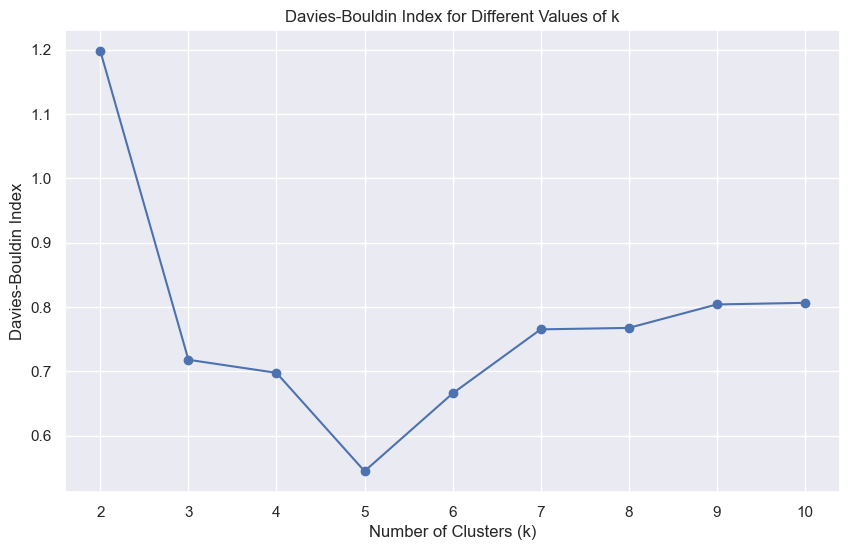

In [112]:
from sklearn.metrics import davies_bouldin_score

# Define a range of values for k (number of clusters)
k_values = range(2, 11)

# Create an empty list to store Davies-Bouldin Index scores
db_scores = []

# Perform K-means clustering for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df3)  
    db_score = davies_bouldin_score(df3, labels)
    db_scores.append(db_score)

# Plot the Davies-Bouldin Index scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(k_values)
plt.show()


### Workings to create a linear regression plot before creating a function.

In [113]:
# long form process to create linear plot
# Independent variable.
x = reviews1['spending_score'] 

# Dependent variable.
y = reviews1['loyalty_points']

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews1).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          2.92e-263
Time:                        21:55:50   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

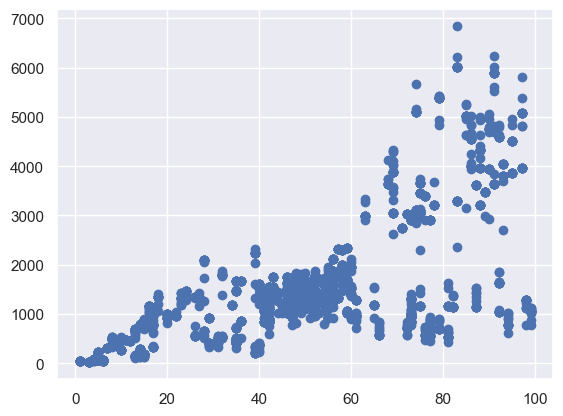

In [114]:
# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [115]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [116]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.0527) + 33.0617 * reviews1['spending_score']

# View the output.
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

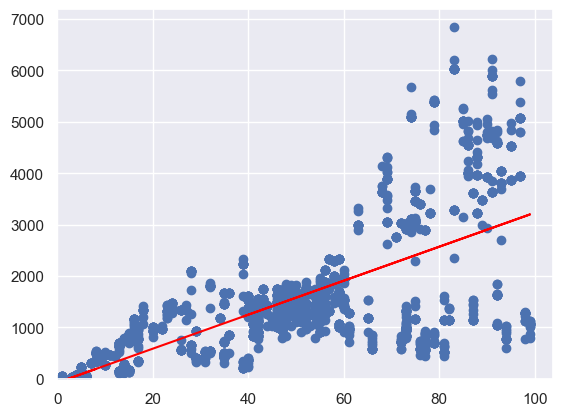

In [117]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

# 

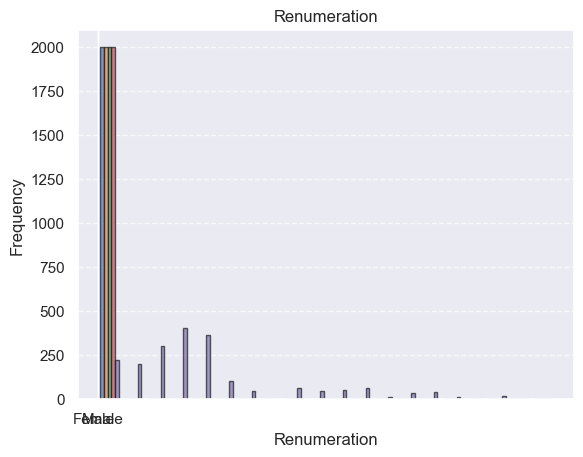

In [118]:
# attempt to create and use a function for the historgram plots
data = df2

create_histogram(data, title='Renumeration', x_label='Renumeration', y_label='Frequency', num_bins=20)


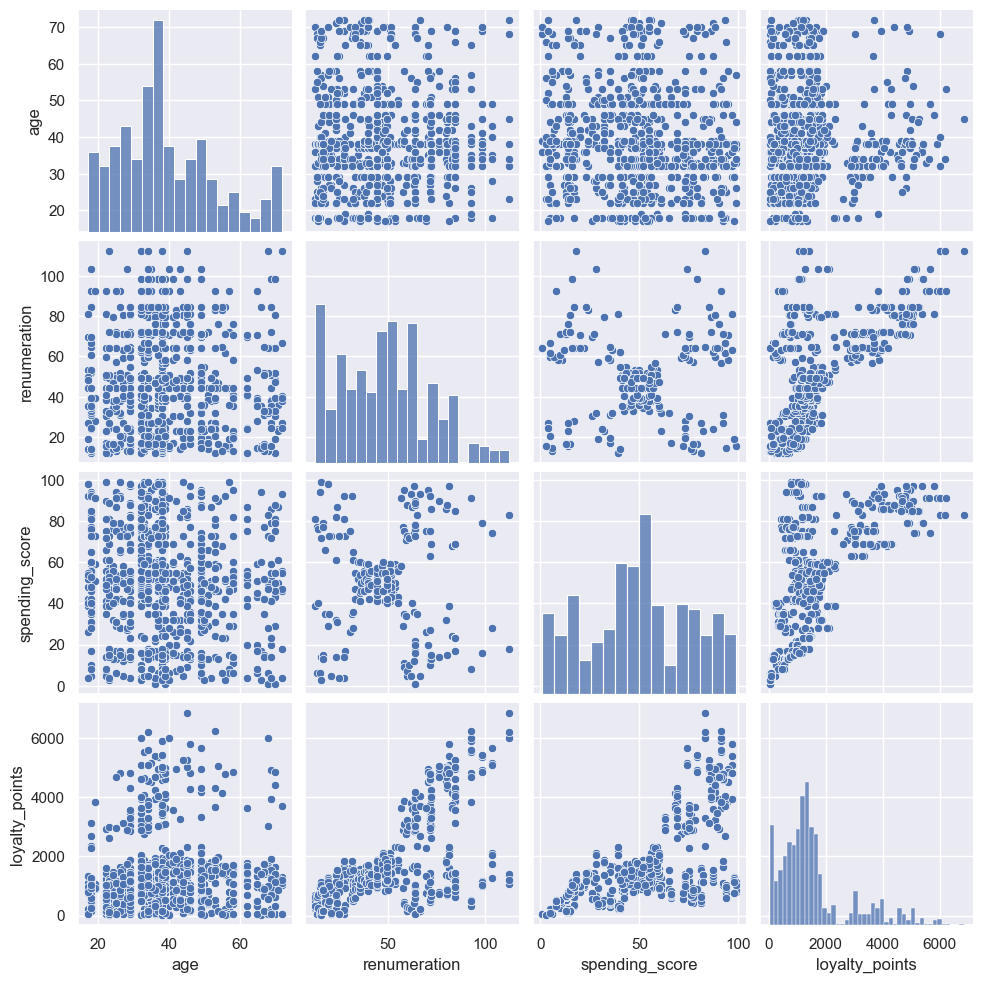

In [119]:
# Additional anlysis to explore data with other columns - areate a pairplot with Seaborn.
sns.pairplot(df2)
plt.show()
### There is some groupings that can be seen particularly with Spending Score and Renumeration, and Age and loyalty points. 


In [120]:
# Load the CSV file(s) as reviews.
sales = pd.read_csv('turtle_sales.csv')

# View the DataFrame.
sales.head(3)

Ranking  Product Platform    Year     Genre Publisher  NA_Sales  EU_Sales  \
0        1      107      Wii  2006.0    Sports  Nintendo     34.02     23.80   
1        2      123      NES  1985.0  Platform  Nintendo     23.85      2.94   
2        3      195      Wii  2008.0    Racing  Nintendo     13.00     10.56   

   Global_Sales  
0         67.85  
1         33.00  
2         29.37

In [121]:
reviews.head(3)

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           An Open Lette

In [122]:
import pandas as pd

sales = pd.DataFrame(sales)
reviews = pd.DataFrame(reviews)

# Rename the "product" column to "Product" in the df_reviews DataFrame
reviews.rename(columns={"product": "Product"}, inplace=True)

# Merge the two DataFrames based on the "Product" column
merged_df = pd.merge(sales, reviews, on="Product", how="inner")

# Display the merged DataFrame
print(merged_df)


      Ranking  Product Platform    Year   Genre        Publisher  NA_Sales  \
0           1      107      Wii  2006.0  Sports         Nintendo     34.02   
1           1      107      Wii  2006.0  Sports         Nintendo     34.02   
2           1      107      Wii  2006.0  Sports         Nintendo     34.02   
3           1      107      Wii  2006.0  Sports         Nintendo     34.02   
4           1      107      Wii  2006.0  Sports         Nintendo     34.02   
...       ...      ...      ...     ...     ...              ...       ...   
3522     8096     9080       PC  2010.0  Sports  Electronic Arts      0.00   
3523     8096     9080       PC  2010.0  Sports  Electronic Arts      0.00   
3524     8096     9080       PC  2010.0  Sports  Electronic Arts      0.00   
3525     8096     9080       PC  2010.0  Sports  Electronic Arts      0.00   
3526     8096     9080       PC  2010.0  Sports  Electronic Arts      0.00   

      EU_Sales  Global_Sales  gender  age  remuneration (k£)  \

In [123]:
merged_df


Ranking  Product Platform    Year   Genre        Publisher  NA_Sales  \
0           1      107      Wii  2006.0  Sports         Nintendo     34.02   
1           1      107      Wii  2006.0  Sports         Nintendo     34.02   
2           1      107      Wii  2006.0  Sports         Nintendo     34.02   
3           1      107      Wii  2006.0  Sports         Nintendo     34.02   
4           1      107      Wii  2006.0  Sports         Nintendo     34.02   
...       ...      ...      ...     ...     ...              ...       ...   
3522     8096     9080       PC  2010.0  Sports  Electronic Arts      0.00   
3523     8096     9080       PC  2010.0  Sports  Electronic Arts      0.00   
3524     8096     9080       PC  2010.0  Sports  Electronic Arts      0.00   
3525     8096     9080       PC  2010.0  Sports  Electronic Arts      0.00   
3526     8096     9080       PC  2010.0  Sports  Electronic Arts      0.00   

      EU_Sales  Global_Sales  gender  age  remuneration (k£)  \
0        23.80         67.85  Female   22              30.34   
1        23.80         67.85  Female   38              30.34   
2        23.80         67.85  Female   38              30.34   
3        23.80         67.85  Female   23              27.06   
4        23.80         67.85  Female   23              24.60   
...        ...           ...     ...  ...                ...   
3522      0.11          0.15  Female   34              79.54   
3523      0.11          0.15  Female   32              72.16   
3524      0.11          0.15  Female   38              98.40   
3525      0.11          0.15  Female   32              82.82   
3526      0.11          0.15    Male   40              15.58   

      spending_score (1-100)  loyalty_points     education language platform  \
0                         75            1159      graduate       EN      Web   
1                         26             551           PhD       EN      Web   
2                         26             551           PhD       EN      Web   
3                         81            1152           PhD       EN      Web   
4                         73             944      graduate       EN      Web   
...                      ...             ...           ...      ...      ...   
3522                      86            4555         Basic       EN      Web   
3523                      86            4007  postgraduate       EN      Web   
3524                      79            5434       diploma       EN      Web   
3525                      68            3636  postgraduate       EN      Web   
3526                       3              33           PhD       EN      Web   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               review  \
0                                                                                                 

In [124]:
# view the top 19 best selling products

# Sort the DataFrame by "Global_Sales" in descending order
merged_df1 = merged_df.sort_values(by="Global_Sales", ascending=False)

# Select the top 19 products with the highest sales
top_19_products = merged_df1.head(19)

print(top_19_products)

    Ranking  Product Platform    Year     Genre Publisher  NA_Sales  EU_Sales  \
0         1      107      Wii  2006.0    Sports  Nintendo     34.02     23.80   
6         1      107      Wii  2006.0    Sports  Nintendo     34.02     23.80   
9         1      107      Wii  2006.0    Sports  Nintendo     34.02     23.80   
8         1      107      Wii  2006.0    Sports  Nintendo     34.02     23.80   
7         1      107      Wii  2006.0    Sports  Nintendo     34.02     23.80   
1         1      107      Wii  2006.0    Sports  Nintendo     34.02     23.80   
5         1      107      Wii  2006.0    Sports  Nintendo     34.02     23.80   
3         1      107      Wii  2006.0    Sports  Nintendo     34.02     23.80   
2         1      107      Wii  2006.0    Sports  Nintendo     34.02     23.80   
4         1      107      Wii  2006.0    Sports  Nintendo     34.02     23.80   
15        2      123      NES  1985.0  Platform  Nintendo     23.85      2.94   
19        2      123      NE

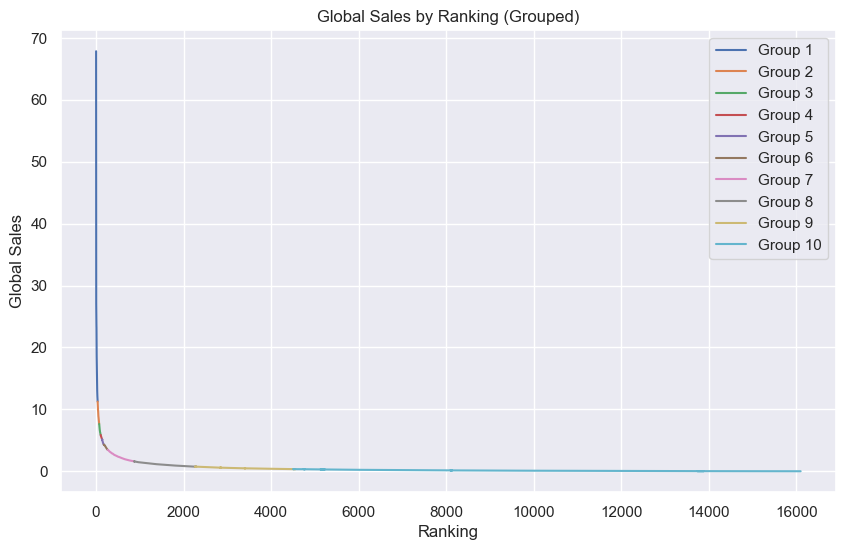

In [125]:

# Create a DataFrame
df_sales = pd.DataFrame(merged_df)

# Sort the DataFrame by "Global Sales" in descending order
df_sales = df_sales.sort_values(by="Global_Sales", ascending=False)

# Determine the number of groups
num_groups = 10

# Calculate the group size
group_size = len(df_sales) // num_groups

# Create an empty list to store the grouped data
grouped_data = []

# Group the data into 10 groups
for i in range(num_groups):
    start_index = i * group_size
    end_index = start_index + group_size
    group = df_sales.iloc[start_index:end_index]
    grouped_data.append(group)

# Create a plot for each group and plot them on one chart
plt.figure(figsize=(10, 6))
for i, group in enumerate(grouped_data):
    plt.plot(group["Ranking"], group["Global_Sales"], label=f"Group {i + 1}")

plt.xlabel("Ranking")
plt.ylabel("Global Sales")
plt.title("Global Sales by Ranking (Grouped)")
plt.legend()
plt.grid(True)
plt.show()


In [126]:
# can see the first group has twice the impact of the next group. 

# Create a DataFrame
df_sales = pd.DataFrame(merged_df)

# Sort the DataFrame by "Global Sales" in descending order
df_sales = df_sales.sort_values(by="Global_Sales", ascending=False)

# Determine the number of groups
num_groups = 10

# Calculate the group size
group_size = len(df_sales) // num_groups

# Create an empty list to store summary information for each group
summary_info = []

# Group the data into 10 groups and calculate statistics for each group
for i in range(num_groups):
    start_index = i * group_size
    end_index = start_index + group_size
    group = df_sales.iloc[start_index:end_index]
    
    # Calculate statistics for the group
    group_summary = {
        "Group": i + 1,
        "Group Size": len(group),
        "Mean Global Sales": group["Global_Sales"].mean(),
        "Median Global Sales": group["Global_Sales"].median(),
        "Min Global Sales": group["Global_Sales"].min(),
        "Max Global Sales": group["Global_Sales"].max(),
        "Std Global Sales": group["Global_Sales"].std(),
        "Ratio of Impact on Sales": (group["Global_Sales"] / df_sales["Global_Sales"].sum()).sum()
    }
    
    summary_info.append(group_summary)

# Create a DataFrame to display the summary information
summary_df = pd.DataFrame(summary_info)

# Display the summary information
print(summary_df)


   Group  Group Size  Mean Global Sales  Median Global Sales  \
0      1         352          19.076591                16.90   
1      2         352           9.175909                 8.98   
2      3         352           6.582955                 6.45   
3      4         352           5.446136                 5.44   
4      5         352           4.616534                 4.55   
5      6         352           4.114489                 4.21   
6      7         352           2.317330                 2.16   
7      8         352           1.148011                 1.15   
8      9         352           0.525852                 0.50   
9     10         352           0.193068                 0.20   

   Min Global Sales  Max Global Sales  Std Global Sales  \
0             11.26             67.85         10.099874   
1              7.64             11.26          1.016274   
2              5.87              7.64          0.524902   
3              5.12              5.87          0.216509   


In [127]:
sales


Ranking  Product Platform    Year         Genre               Publisher  \
0          1      107      Wii  2006.0        Sports                Nintendo   
1          2      123      NES  1985.0      Platform                Nintendo   
2          3      195      Wii  2008.0        Racing                Nintendo   
3          4      231      Wii  2009.0        Sports                Nintendo   
4          5      249       GB  1996.0  Role-Playing                Nintendo   
..       ...      ...      ...     ...           ...                     ...   
347    13227     3436       PC  2003.0        Racing         Electronic Arts   
348    13734      629       PC  2003.0        Action    Take-Two Interactive   
349    13886     4399       PC  2003.0       Shooter  Microsoft Game Studios   
350    15784     4702       PC  2007.0       Shooter  Microsoft Game Studios   
351    16096     1012       PC  2002.0        Action    Take-Two Interactive   

     NA_Sales  EU_Sales  Global_Sales  
0       34.02     23.80         67.85  
1       23.85      2.94         33.00  
2       13.00     10.56         29.37  
3       12.92      9.03         27.06  
4        9.24      7.29         25.72  
..        ...       ...           ...  
347      0.00      0.03          0.04  
348      0.00      0.02          0.03  
349      0.01      0.02          0.03  
350      0.00      0.01          0.02  
351      0.00      0.01          0.01  

[352 rows x 9 columns]

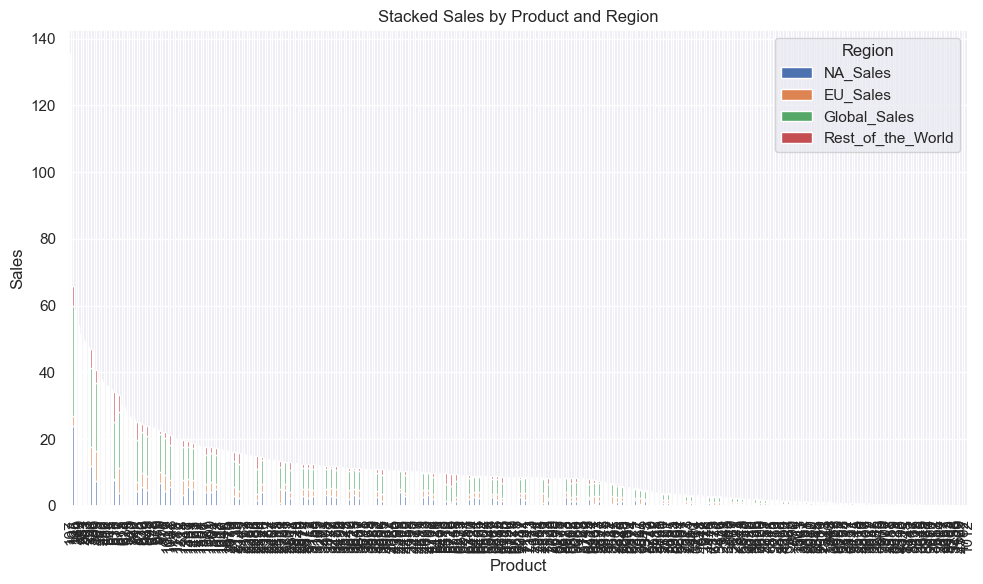

In [128]:

# Create the "sales" DataFrame
sales = pd.DataFrame(sales)

# Calculate the "Rest_of_the_World" sales as the difference between Global Sales and the sum of NA and EU Sales
sales["Rest_of_the_World"] = sales["Global_Sales"] - (sales["NA_Sales"] + sales["EU_Sales"])

# Drop the specified columns
columns_to_drop = ["Ranking", "Platform", "Year", "Genre", "Publisher"]
sales = sales.drop(columns=columns_to_drop)

# Set the index to "Product" for easy plotting
sales.set_index("Product", inplace=True)

# Create a stacked bar chart
sales.plot(kind="bar", stacked=True, figsize=(10, 6))

# Customize the plot
plt.xlabel("Product")
plt.ylabel("Sales")
plt.title("Stacked Sales by Product and Region")

# Show the plot
plt.legend(title="Region")
plt.tight_layout()
plt.show()


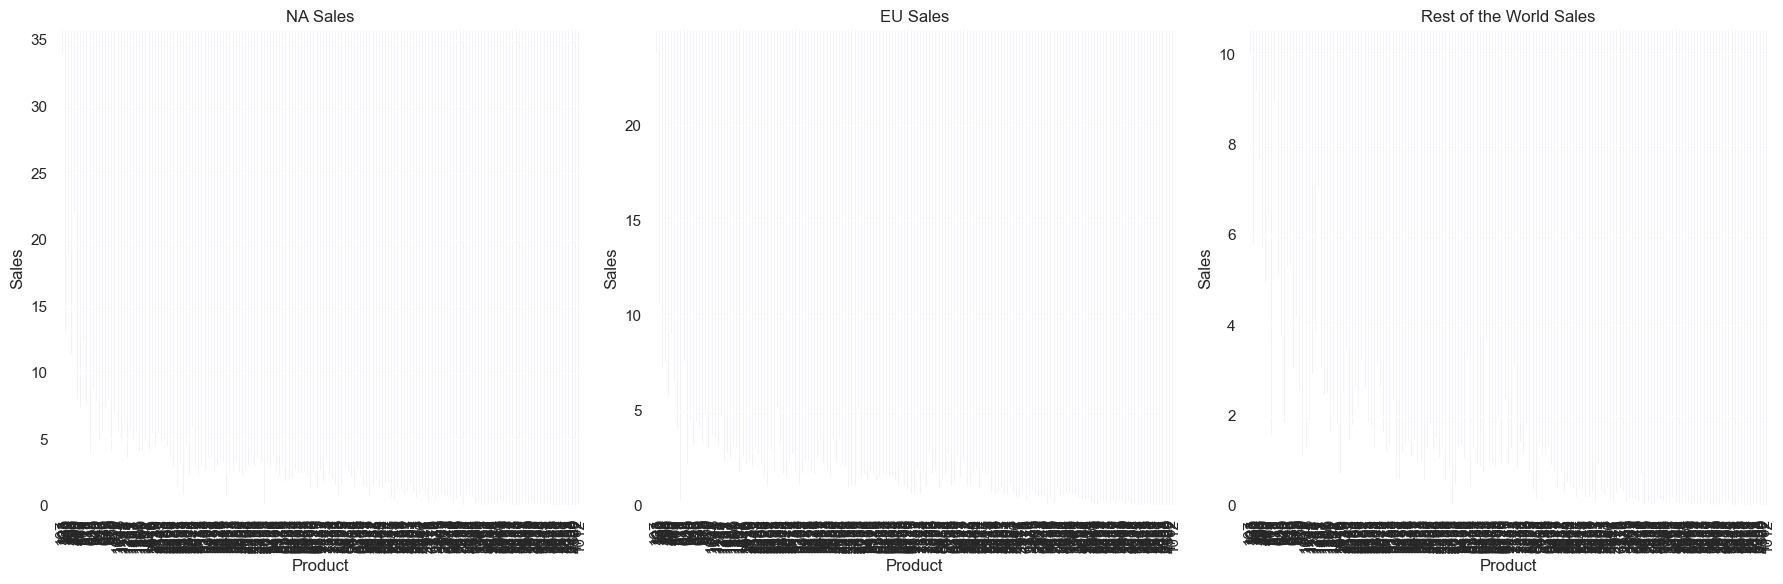

In [129]:

# Create the "sales" DataFrame
sales = pd.DataFrame(sales)

# Calculate the "Rest_of_the_World" sales as the difference between Global Sales and the sum of NA and EU Sales
sales["Rest_of_the_World"] = sales["Global_Sales"] - (sales["NA_Sales"] + sales["EU_Sales"])

# Create subplots with three side-by-side plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot "NA_Sales" in the first subplot
sales["NA_Sales"].plot(kind="bar", ax=axs[0], color="blue")
axs[0].set_xlabel("Product")
axs[0].set_ylabel("Sales")
axs[0].set_title("NA Sales")

# Plot "EU_Sales" in the second subplot
sales["EU_Sales"].plot(kind="bar", ax=axs[1], color="green")
axs[1].set_xlabel("Product")
axs[1].set_ylabel("Sales")
axs[1].set_title("EU Sales")

# Plot "Rest_of_the_World" in the third subplot
sales["Rest_of_the_World"].plot(kind="bar", ax=axs[2], color="orange")
axs[2].set_xlabel("Product")
axs[2].set_ylabel("Sales")
axs[2].set_title("Rest of the World Sales")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()
